## Introduction

In telecommunication business with multiple competitors in the business, it’s quite important to re-engaging existing customers further to keep them from churning/Leaving. This project focuses on build models for a Tele-company to predict customer’s behavior and prevent them from abandoning the business. Project goal is to identify churn customers to predict future churn in order to decrease the churn rate and keep existing customers based on historic data.

Churned Customers are those who have decided to end their relationship with their existing service/company. It can happen due to variety of reasons. In this project, I will using the telecommunication customer churn dataset from Kaggle.com, feeding the data to multiple models for classification to identify why those customer churn and find out who churned in the past and using the model to predict potential churn customer. The project can be show-case to company high level management team for making next year more profitable plan.
Project will provide relevant information on customer features with different importance. The models results, statistical tests results and feature information coming out from models can be used by telecommunication company to make strategy for different kinds of customer. Simplyly to say, telecommunication companies can use my project result to keep their customers around as long as possible and reduce the potential churn rate in the future.


## Data

Data Source : https://www.kaggle.com/becksddf/churn-in-telecoms-dataset 

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import plotly
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
from plotly.offline import plot, iplot
import plotly.graph_objects as go
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from scipy import stats
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
import umap
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [2]:
tel_cus=pd.read_csv('data/final capstone/bigml_59c28831336c6604c800002a.csv')
tel_cus

state  account length  area code phone number international plan  \
0       KS             128        415     382-4657                 no   
1       OH             107        415     371-7191                 no   
2       NJ             137        415     358-1921                 no   
3       OH              84        408     375-9999                yes   
4       OK              75        415     330-6626                yes   
5       AL             118        510     391-8027                yes   
6       MA             121        510     355-9993                 no   
7       MO             147        415     329-9001                yes   
8       LA             117        408     335-4719                 no   
9       WV             141        415     330-8173                yes   
10      IN              65        415     329-6603                 no   
11      RI              74        415     344-9403                 no   
12      IA             168        408     363-1107                 no   
13      MT              95        510     394-8006                 no   
14      IA              62        415     366-9238                 no   
15      NY             161        415     351-7269                 no   
16      ID              85        408     350-8884                 no   
17      VT              93        510     386-2923                 no   
18      VA              76        510     356-2992                 no   
19      TX              73        415     373-2782                 no   
20      FL             147        415     396-5800                 no   
21      CO              77        408     393-7984                 no   
22      AZ             130        415     358-1958                 no   
23      SC             111        415     350-2565                 no   
24      VA             132        510     343-4696                 no   
25      NE             174        415     331-3698                 no   
26      WY              57        408     357-3817                 no   
27      MT              54        408     418-6412                 no   
28      MO              20        415     353-2630                 no   
29      HI              49        510     410-7789                 no   
...    ...             ...        ...          ...                ...   
3303    WI             114        415     373-7308                 no   
3304    IL              71        510     330-7137                yes   
3305    IN              58        415     406-8445                 no   
3306    AL             106        408     404-5283                 no   
3307    OK             172        408     398-3632                 no   
3308    IA              45        415     399-5763                 no   
3309    VT             100        408     340-9449                yes   
3310    NY              94        415     363-1123                 no   
3311    LA             128        415     361-2170                 no   
3312    SC             181        408     406-6304                 no   
3313    ID             127        408     392-5090                 no   
3314    MO              89        415     373-7713                 no   
3315    ME             149        415     392-1376                 no   
3316    MS             103        510     390-6388                 no   
3317    SD             163        415     379-7290                yes   
3318    OK              52        415     397-9928                 no   
3319    WY              89        415     378-6924                 no   
3320    GA             122        510     411-5677                yes   
3321    VT              60        415     400-2738                 no   
3322    MD              62        408     409-1856                 no   
3323    IN             117        415     362-5899                 no   
3324    WV             159        415     377-1164                 no   
3325    OH              78        408     368-8555             

In [3]:
# Exploratory data analysis
# separate data set based on column churn

churn_0=tel_cus[tel_cus['churn']==0]
churn_1=tel_cus[tel_cus['churn']==1]

In [4]:
churn_0

state  account length  area code phone number international plan  \
0       KS             128        415     382-4657                 no   
1       OH             107        415     371-7191                 no   
2       NJ             137        415     358-1921                 no   
3       OH              84        408     375-9999                yes   
4       OK              75        415     330-6626                yes   
5       AL             118        510     391-8027                yes   
6       MA             121        510     355-9993                 no   
7       MO             147        415     329-9001                yes   
8       LA             117        408     335-4719                 no   
9       WV             141        415     330-8173                yes   
11      RI              74        415     344-9403                 no   
12      IA             168        408     363-1107                 no   
13      MT              95        510     394-8006                 no   
14      IA              62        415     366-9238                 no   
16      ID              85        408     350-8884                 no   
17      VT              93        510     386-2923                 no   
18      VA              76        510     356-2992                 no   
19      TX              73        415     373-2782                 no   
20      FL             147        415     396-5800                 no   
22      AZ             130        415     358-1958                 no   
23      SC             111        415     350-2565                 no   
24      VA             132        510     343-4696                 no   
25      NE             174        415     331-3698                 no   
26      WY              57        408     357-3817                 no   
27      MT              54        408     418-6412                 no   
28      MO              20        415     353-2630                 no   
29      HI              49        510     410-7789                 no   
30      IL             142        415     416-8428                 no   
31      NH              75        510     370-3359                 no   
32      LA             172        408     383-1121                 no   
...    ...             ...        ...          ...                ...   
3298    MD              83        510     340-9013                 no   
3299    NC              73        408     362-8378                 no   
3300    SC             111        415     418-8969                 no   
3302    LA              75        510     358-9898                yes   
3303    WI             114        415     373-7308                 no   
3305    IN              58        415     406-8445                 no   
3306    AL             106        408     404-5283                 no   
3307    OK             172        408     398-3632                 no   
3308    IA              45        415     399-5763                 no   
3309    VT             100        408     340-9449                yes   
3310    NY              94        415     363-1123                 no   
3311    LA             128        415     361-2170                 no   
3312    SC             181        408     406-6304                 no   
3313    ID             127        408     392-5090                 no   
3314    MO              89        415     373-7713                 no   
3315    ME             149        415     392-1376                 no   
3316    MS             103        510     390-6388                 no   
3317    SD             163        415     379-7290                yes   
3318    OK              52        415     397-9928                 no   
3319    WY              89        415     378-6924                 no   
3321    VT              60        415     400-2738                 no   
3324    WV             159        415     377-1164                 no   
3325    OH              78        408     368-8555             

In [5]:
tel_cus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
state                     3333 non-null object
account length            3333 non-null int64
area code                 3333 non-null int64
phone number              3333 non-null object
international plan        3333 non-null object
voice mail plan           3333 non-null object
number vmail messages     3333 non-null int64
total day minutes         3333 non-null float64
total day calls           3333 non-null int64
total day charge          3333 non-null float64
total eve minutes         3333 non-null float64
total eve calls           3333 non-null int64
total eve charge          3333 non-null float64
total night minutes       3333 non-null float64
total night calls         3333 non-null int64
total night charge        3333 non-null float64
total intl minutes        3333 non-null float64
total intl calls          3333 non-null int64
total intl charge         3333 non-null float64

In [6]:
churn_1.shape

(483, 21)

## Exploratory Data Analysis

In [7]:
# plot churn_0 column cutomer service calls

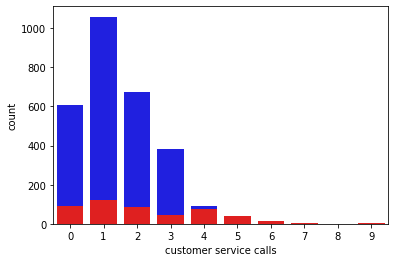

In [9]:
# count plot
sns.countplot(churn_0['customer service calls'],color='b');
sns.countplot(churn_1['customer service calls'],color='r'); # set alpha level and set legend

Separate the original dataset based on customer service call column, check if 4 calls is the tipping point for differentiate between churn and not-churn group.

In [10]:
churn_0.describe()

account length    area code  number vmail messages  total day minutes  \
count     2850.000000  2850.000000            2850.000000        2850.000000   
mean       100.793684   437.074737               8.604561         175.175754   
std         39.882350    42.306156              13.913125          50.181655   
min          1.000000   408.000000               0.000000           0.000000   
25%         73.000000   408.000000               0.000000         142.825000   
50%        100.000000   415.000000               0.000000         177.200000   
75%        127.000000   510.000000              22.000000         210.300000   
max        243.000000   510.000000              51.000000         315.600000   

       total day calls  total day charge  total eve minutes  total eve calls  \
count      2850.000000       2850.000000        2850.000000      2850.000000   
mean        100.283158         29.780421         199.043298       100.038596   
std          19.801157          8.530835          50.292175        19.958414   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.282500         164.500000        87.000000   
50%         100.000000         30.120000         199.600000       100.000000   
75%         114.000000         35.750000         233.200000       114.000000   
max         163.000000         53.650000         361.800000       170.000000   

       total eve charge  total night minutes  total night calls  \
count       2850.000000          2850.000000        2850.000000   
mean          16.918909           200.133193         100.058246   
std            4.274863            51.105032          19.506246   
min            0.000000            23.200000          33.000000   
25%           13.980000           165.900000          87.000000   
50%           16.970000           200.250000         100.000000   
75%           19.820000           234.900000         113.000000   
max           30.750000           395.000000         175.000000   

       total night charge  total intl minutes  total intl calls  \
count         2850.000000         2850.000000       2850.000000   
mean             9.006074           10.158877          4.532982   
std              2.299768            2.784489          2.441984   
min              1.040000            0.000000          0.000000   
25%              7.470000            8.400000          3.000000   
50%              9.010000           10.200000          4.000000   
75%             10.570000           12.000000          6.000000   
max             17.770000           18.900000         19.000000   

       total intl charge  customer service calls  
count        2850.000000             2850.000000  
mean            2.743404                1.449825  
std             0.751784                1.163883  
min             0.000000                0.000000  
25%             2.270000                1.000000  
50%             2.750000                1.000000  
75%             3.240000                2.000000  
max             5.100000                8.000000

In [11]:
churn_1.describe()

account length   area code  number vmail messages  total day minutes  \
count      483.000000  483.000000             483.000000         483.000000   
mean       102.664596  437.817805               5.115942         206.914079   
std         39.467820   42.792270              11.860138          68.997792   
min          1.000000  408.000000               0.000000           0.000000   
25%         76.000000  408.000000               0.000000         153.250000   
50%        103.000000  415.000000               0.000000         217.600000   
75%        127.000000  510.000000               0.000000         265.950000   
max        225.000000  510.000000              48.000000         350.800000   

       total day calls  total day charge  total eve minutes  total eve calls  \
count       483.000000        483.000000         483.000000       483.000000   
mean        101.335404         35.175921         212.410145       100.561077   
std          21.582307         11.729710          51.728910        19.724711   
min           0.000000          0.000000          70.900000        48.000000   
25%          87.500000         26.055000         177.100000        87.000000   
50%         103.000000         36.990000         211.300000       101.000000   
75%         116.500000         45.210000         249.450000       114.000000   
max         165.000000         59.640000         363.700000       168.000000   

       total eve charge  total night minutes  total night calls  \
count        483.000000           483.000000         483.000000   
mean          18.054969           205.231677         100.399586   
std            4.396762            47.132825          19.950659   
min            6.030000            47.400000          49.000000   
25%           15.055000           171.250000          85.000000   
50%           17.960000           204.800000         100.000000   
75%           21.205000           239.850000         115.000000   
max           30.910000           354.900000         158.000000   

       total night charge  total intl minutes  total intl calls  \
count          483.000000           483.00000        483.000000   
mean             9.235528            10.70000          4.163561   
std              2.121081             2.79319          2.551575   
min              2.130000             2.00000          1.000000   
25%              7.705000             8.80000          2.000000   
50%              9.220000            10.60000          4.000000   
75%             10.795000            12.80000          5.000000   
max             15.970000            20.00000         20.000000   

       total intl charge  customer service calls  
count         483.000000              483.000000  
mean            2.889545                2.229814  
std             0.754152                1.853275  
min             0.540000                0.000000  
25%             2.380000                1.000000  
50%             2.860000                2.000000  
75%             3.460000                4.000000  
max             5.400000                9.000000

2 customer service calls is the tipping point for churning.

From the two tables of stats for churn customers and not-churn customers, it shows average of the two groups, not-churn customers are 1.45 and 2.22. Therefore 4 customer services calls is not tipping point according to this stats results.

Average of total day mins and average of total day charge are quite different there. Group of churn has much higher of total data mins and higher total day charge comparing to group of not-churn. This could be the indication that customers who churned might had higher phone charge than customer who didn't churn, regarding the total day charge and total day mins. 

Business wise to see, company might need to work on reducing the day phone call charge to those people who has more day calls in order to prevent churn in the future.

From the customer service call kde plot to see, it's hard to differentiate between cutomers who did not churn and who churned

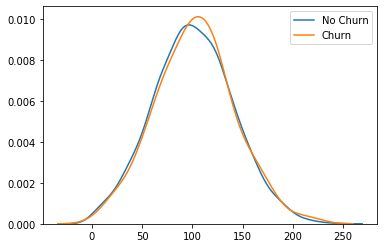

In [38]:
# account length plot for churn group and no-churn group

ax_acc_length0=sns.kdeplot(churn_0['account length'],label='No Churn');
ax_acc_length1=sns.kdeplot(churn_1['account length'],label='Churn');
plt.legend();

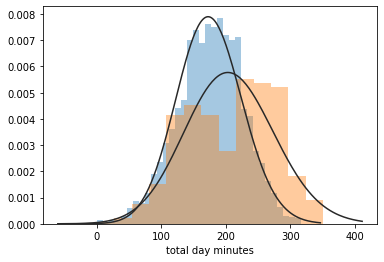

In [17]:
# check out some potential import columns

ax_daymin0=sns.distplot(churn_0['total day minutes'],kde=False,fit=stats.gamma)
ax_daymin1=sns.distplot(churn_1['total day minutes'],kde=False,fit=stats.gamma)

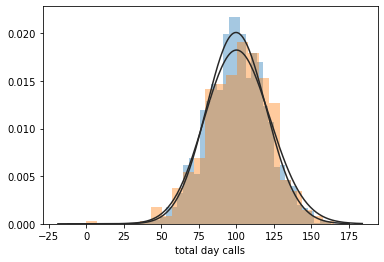

In [20]:
# check total day calls in churn 0 and churn 1
ax_daycalls0=sns.distplot(churn_0['total day calls'],kde=False,fit=stats.gamma)
ax_daycalls1=sns.distplot(churn_1['total day calls'],kde=False,fit=stats.gamma)

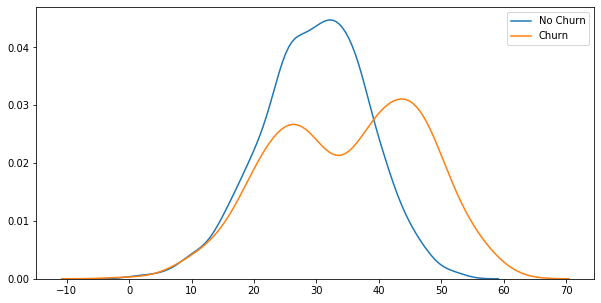

In [37]:
# let's check out the day charge, even charge, and night charge, since charge is a big factor playing in the phone serice normally
plt.figure(figsize=(10,5))
ax_daycharge0=sns.kdeplot(churn_0['total day charge'],label='No Churn');
ax_daycharge1=sns.kdeplot(churn_1['total day charge'],label='Churn');
plt.legend();

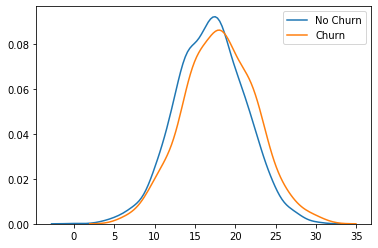

In [40]:
# check out total even charge
ax_evecharge0=sns.kdeplot(churn_0['total eve charge'],label='No Churn')
ax_evecharge1=sns.kdeplot(churn_1['total eve charge'],label='Churn')
plt.legend();

In [16]:
# variable to differentiate between 

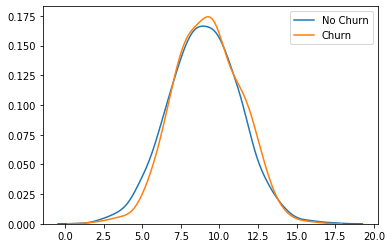

In [42]:
# check out night charge
ax_nightcharge0=sns.kdeplot(churn_0['total night charge'],label='No Churn');
ax_nightcharge1=sns.kdeplot(churn_1['total night charge'],label='Churn');
plt.legend();

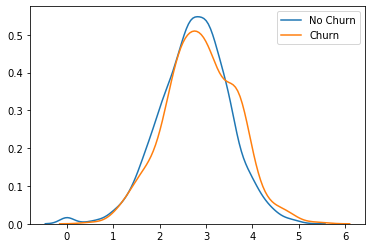

In [44]:
# check total intl charge
ax_intlcharge0=sns.kdeplot(churn_0['total intl charge'],label='No Churn');
ax_intlcharge1=sns.kdeplot(churn_1['total intl charge'],label='Churn');
plt.legend();

In [19]:
# reviewing those comparison plots above, I decide to only take these columns into building model
# customer service calls, total day minutes, total day charge

In [20]:
type(tel_cus['churn'])

pandas.core.series.Series

In [21]:
#tel_cus['churn']

In [22]:
# try write in one line
tel_cus['churn']=pd.Series(np.where(tel_cus.churn.values == True, 1, 0),tel_cus.index)

In [23]:
tel_cus

state  account length  area code phone number international plan  \
0       KS             128        415     382-4657                 no   
1       OH             107        415     371-7191                 no   
2       NJ             137        415     358-1921                 no   
3       OH              84        408     375-9999                yes   
4       OK              75        415     330-6626                yes   
5       AL             118        510     391-8027                yes   
6       MA             121        510     355-9993                 no   
7       MO             147        415     329-9001                yes   
8       LA             117        408     335-4719                 no   
9       WV             141        415     330-8173                yes   
10      IN              65        415     329-6603                 no   
11      RI              74        415     344-9403                 no   
12      IA             168        408     363-1107                 no   
13      MT              95        510     394-8006                 no   
14      IA              62        415     366-9238                 no   
15      NY             161        415     351-7269                 no   
16      ID              85        408     350-8884                 no   
17      VT              93        510     386-2923                 no   
18      VA              76        510     356-2992                 no   
19      TX              73        415     373-2782                 no   
20      FL             147        415     396-5800                 no   
21      CO              77        408     393-7984                 no   
22      AZ             130        415     358-1958                 no   
23      SC             111        415     350-2565                 no   
24      VA             132        510     343-4696                 no   
25      NE             174        415     331-3698                 no   
26      WY              57        408     357-3817                 no   
27      MT              54        408     418-6412                 no   
28      MO              20        415     353-2630                 no   
29      HI              49        510     410-7789                 no   
...    ...             ...        ...          ...                ...   
3303    WI             114        415     373-7308                 no   
3304    IL              71        510     330-7137                yes   
3305    IN              58        415     406-8445                 no   
3306    AL             106        408     404-5283                 no   
3307    OK             172        408     398-3632                 no   
3308    IA              45        415     399-5763                 no   
3309    VT             100        408     340-9449                yes   
3310    NY              94        415     363-1123                 no   
3311    LA             128        415     361-2170                 no   
3312    SC             181        408     406-6304                 no   
3313    ID             127        408     392-5090                 no   
3314    MO              89        415     373-7713                 no   
3315    ME             149        415     392-1376                 no   
3316    MS             103        510     390-6388                 no   
3317    SD             163        415     379-7290                yes   
3318    OK              52        415     397-9928                 no   
3319    WY              89        415     378-6924                 no   
3320    GA             122        510     411-5677                yes   
3321    VT              60        415     400-2738                 no   
3322    MD              62        408     409-1856                 no   
3323    IN             117        415     362-5899                 no   
3324    WV             159        415     377-1164                 no   
3325    OH              78        408     368-8555             

In [24]:
y=tel_cus['churn']

In [25]:
tel_cus.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

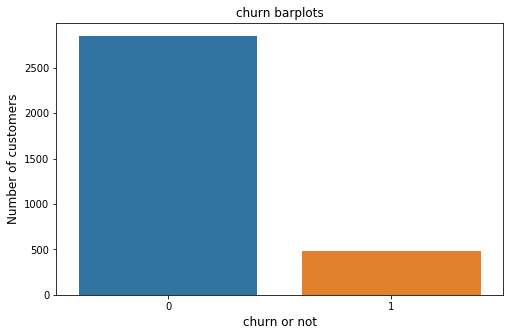

In [26]:
plt.figure(figsize=(8,5))
sns.barplot(x=tel_cus.churn.value_counts().index, y=tel_cus.churn.value_counts())
plt.title('churn barplots')
plt.ylabel('Number of customers', fontsize=12)
plt.xlabel('churn or not', fontsize=12)
plt.show()

In [27]:
tel_cus['churn'].value_counts()

0    2850
1     483
Name: churn, dtype: int64

Let's see some stats about group of churn and group of no-churn

In [28]:
# select only numeric data
num_df=tel_cus.select_dtypes(exclude='object')

In [29]:
y=num_df['churn']
num_df=num_df.iloc[:,:-1]

In [30]:
num_df.columns

Index(['account length', 'area code', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls'],
      dtype='object')

In [31]:
num_df=num_df.drop(['area code'],axis=1)

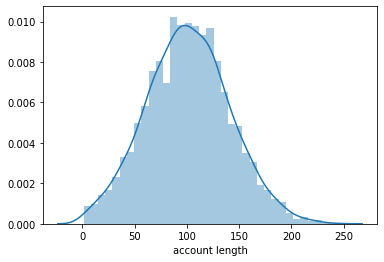

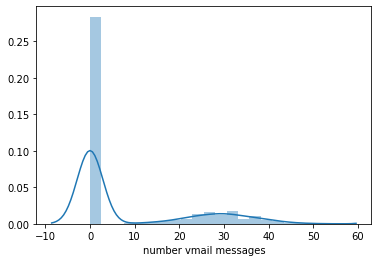

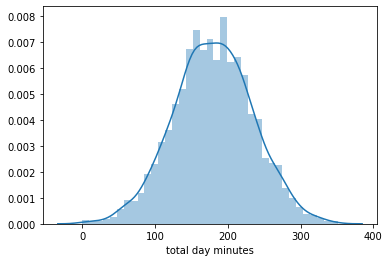

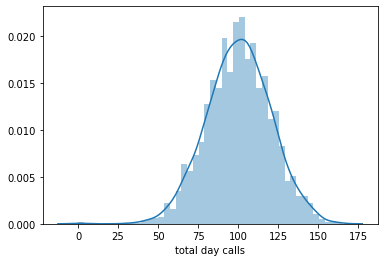

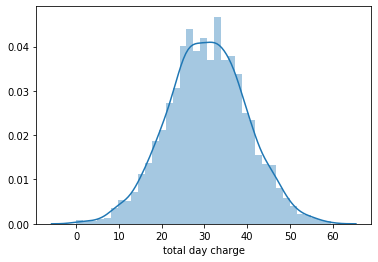

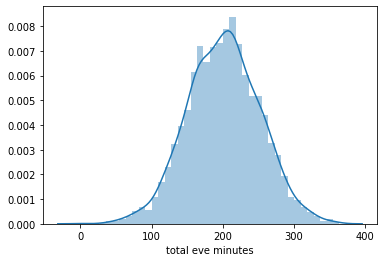

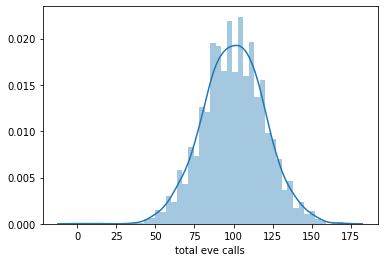

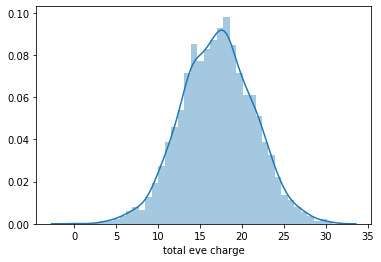

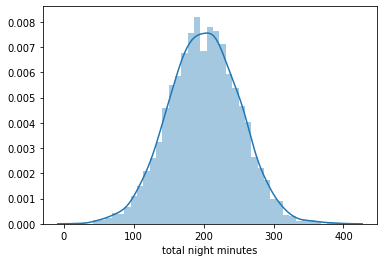

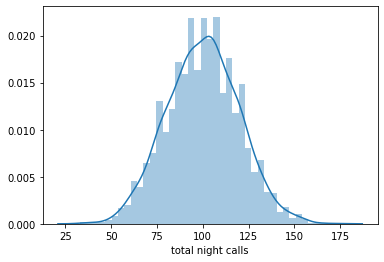

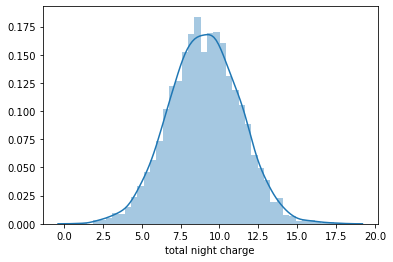

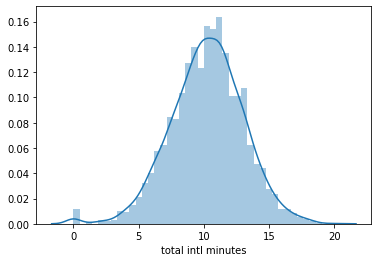

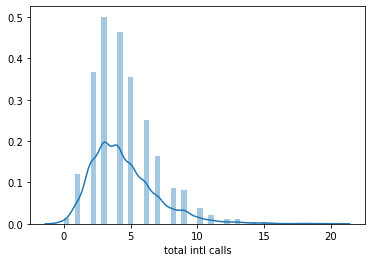

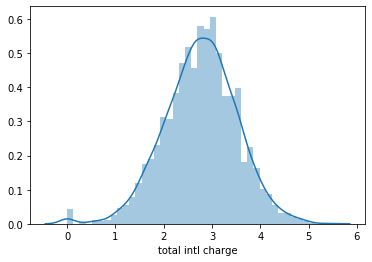

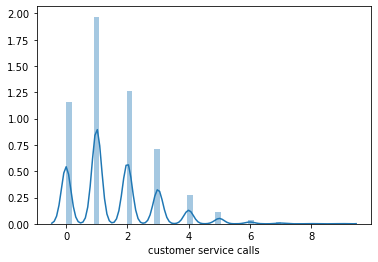

In [32]:
# plot histogram of each numeric column

for i, col in enumerate(num_df.columns):
    plt.figure(i)
    sns.distplot(num_df[col])

I took a closer look, found out thoese non-normally distributed columns from the plots above, there are not much difference between churn group and no-churn group for those columns.So I didn't apply cox-box method to the non-normally distributed columns. Plus there are a lot of "0" in those columns, applying box-cox to columns requires removing those 0, but it's not reasonable to remove 0 for now. So I just keep those non-normally distributed columns for later instead of transformation.

In [22]:
# now check column state 
colors = plotly.colors.DEFAULT_PLOTLY_COLORS
churn_dict = {0: "no churn", 1: "churn"}

In [46]:

state_churn_df = tel_cus.groupby(["state", "churn"]).size().unstack()
trace1 = go.Bar(
    x=state_churn_df.index,
    y=state_churn_df[0],
    marker = dict(color = colors[0]),
    name='no churn'
)
trace2 = go.Bar(
    x=state_churn_df.index,
    y=state_churn_df[1],
    marker = dict(color = colors[1]),
    name='churn'
)

data = [trace1, trace2]
layout = go.Layout(
    title='Churn distribution per state',
    autosize=True,
    barmode='stack',
    margin=go.layout.Margin(l=50, r=50),
    xaxis=dict(
        title='state',
        tickangle=45
    ),
    yaxis=dict(
        title='#samples',
        automargin=True,
    ),
    legend=dict(
        x=0,
        y=1,
    ),
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='stacked-bar')

## Modeling (including supervised learning and unsupervised learning methods)

In [35]:
new_df1=tel_cus[['state','international plan','voice mail plan','total day minutes','total day charge','customer service calls']]

In [36]:
array_state=new_df1['state'].unique()

In [37]:
array_state

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
       'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
       'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
       'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
       'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object)

In [38]:
list_state=array_state.tolist()

In [39]:

le = preprocessing.LabelEncoder()
le.fit(list_state)
new_df1['state']=le.transform(new_df1['state']) 

C:\Users\Yinan\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [40]:
new_df1

state international plan voice mail plan  total day minutes  \
0        16                 no             yes              265.1   
1        35                 no             yes              161.6   
2        31                 no              no              243.4   
3        35                yes              no              299.4   
4        36                yes              no              166.7   
5         1                yes              no              223.4   
6        19                 no             yes              218.2   
7        24                yes              no              157.0   
8        18                 no              no              184.5   
9        49                yes             yes              258.6   
10       15                 no              no              129.1   
11       39                 no              no              187.7   
12       12                 no              no              128.8   
13       26                 no              no              156.6   
14       12                 no              no              120.7   
15       34                 no              no              332.9   
16       13                 no             yes              196.4   
17       46                 no              no              190.7   
18       45                 no             yes              189.7   
19       43                 no              no              224.4   
20        9                 no              no              155.1   
21        5                 no              no               62.4   
22        3                 no              no              183.0   
23       40                 no              no              110.4   
24       45                 no              no               81.1   
25       29                 no              no              124.3   
26       50                 no             yes              213.0   
27       26                 no              no              134.3   
28       24                 no              no              190.0   
29       11                 no              no              119.3   
...     ...                ...             ...                ...   
3303     48                 no             yes              137.1   
3304     14                yes              no              186.1   
3305     15                 no             yes              224.1   
3306      1                 no             yes               83.6   
3307     36                 no              no              203.9   
3308     12                 no              no              211.3   
3309     46                yes              no              219.4   
3310     34                 no              no              190.4   
3311     18                 no              no              147.7   
3312     40                 no              no              229.9   
3313     13                 no              no              102.8   
3314     24                 no              no              178.7   
3315     21                 no             yes              148.5   
3316     25                 no             yes              164.1   
3317     41                yes              no              197.2   
3318     36                 no              no              124.9   
3319     50                 no              no              115.4   
3320     10                yes              no              140.0   
3321     46                 no              no              193.9   
3322     20                 no              no              321.1   
3323     15                 no              no              118.4   
3324     49                 no              no              169.8   
3325     35                 no              no              193.4   
3326     35                 no              no              106.6   
3327     40                 no              no              134.7   
3328      3                 no             yes              156.2   
3329

In [41]:
intl_plan=new_df1['international plan'].unique()
list_plan=intl_plan.tolist()

In [42]:
list_plan

['no', 'yes']

In [43]:
le = preprocessing.LabelEncoder()
le.fit(list_plan)
new_df1['international plan']=le.transform(new_df1['international plan']) 

C:\Users\Yinan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [44]:
voice_plan=new_df1['voice mail plan'].unique()
voice_plan=voice_plan.tolist()
voice_plan

['yes', 'no']

In [45]:
le = preprocessing.LabelEncoder()
le.fit(voice_plan)
new_df1['voice mail plan']=le.transform(new_df1['voice mail plan']) 

C:\Users\Yinan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [46]:
new_df1.head(10)

state  international plan  voice mail plan  total day minutes  \
0     16                   0                1              265.1   
1     35                   0                1              161.6   
2     31                   0                0              243.4   
3     35                   1                0              299.4   
4     36                   1                0              166.7   
5      1                   1                0              223.4   
6     19                   0                1              218.2   
7     24                   1                0              157.0   
8     18                   0                0              184.5   
9     49                   1                1              258.6   

   total day charge  customer service calls  
0             45.07                       1  
1             27.47                       1  
2             41.38                       0  
3             50.90                       2  
4             28.34                       3  
5             37.98                       0  
6             37.09                       3  
7             26.69                       0  
8             31.37                       1  
9             43.96                       0

In [47]:
x_train=new_df1.iloc[:2500,:]
x_test=new_df1.iloc[2500:,:]
y_train=y.iloc[:2500,]
y_test=y.iloc[2500:,]

In [48]:
x_train.head()

state  international plan  voice mail plan  total day minutes  \
0     16                   0                1              265.1   
1     35                   0                1              161.6   
2     31                   0                0              243.4   
3     35                   1                0              299.4   
4     36                   1                0              166.7   

   total day charge  customer service calls  
0             45.07                       1  
1             27.47                       1  
2             41.38                       0  
3             50.90                       2  
4             28.34                       3

In [49]:
# state column should be convert to dummy variables

In [50]:
x_train

state  international plan  voice mail plan  total day minutes  \
0        16                   0                1              265.1   
1        35                   0                1              161.6   
2        31                   0                0              243.4   
3        35                   1                0              299.4   
4        36                   1                0              166.7   
5         1                   1                0              223.4   
6        19                   0                1              218.2   
7        24                   1                0              157.0   
8        18                   0                0              184.5   
9        49                   1                1              258.6   
10       15                   0                0              129.1   
11       39                   0                0              187.7   
12       12                   0                0              128.8   
13       26                   0                0              156.6   
14       12                   0                0              120.7   
15       34                   0                0              332.9   
16       13                   0                1              196.4   
17       46                   0                0              190.7   
18       45                   0                1              189.7   
19       43                   0                0              224.4   
20        9                   0                0              155.1   
21        5                   0                0               62.4   
22        3                   0                0              183.0   
23       40                   0                0              110.4   
24       45                   0                0               81.1   
25       29                   0                0              124.3   
26       50                   0                1              213.0   
27       26                   0                0              134.3   
28       24                   0                0              190.0   
29       11                   0                0              119.3   
...     ...                 ...              ...                ...   
2470     25                   0                0              227.8   
2471     35                   0                1              160.3   
2472     15                   0                0              137.8   
2473      5                   0                1              141.7   
2474     43                   0                1              196.4   
2475      0                   0                0              175.2   
2476     49                   0                0              146.8   
2477     19                   0                0              173.9   
2478     42                   0                1              305.2   
2479     13                   1                1              162.3   
2480      8                   1                0              150.0   
2481     45                   0                0              197.5   
2482     26                   0                0              240.2   
2483     13                   0                1              186.2   
2484     15                   0                1              116.9   
2485     20                   0                1              236.7   
2486     25                   0                0              173.2   
2487     47                   0                0              152.2   
2488     35                   0                0              181.3   
2489     39                   0                0              167.8   
2490      2                   0                0              175.4   
2491      3                   0                0               87.6   
2492     40                   0                0              203.3   
2493     17                   0                0               92.6   
2494      1                   

### Decision Tree Classifier

In [51]:
# fit data into decision tree classifier
# Make a decision tree and train
tree = DecisionTreeClassifier(criterion='entropy')
tree.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [52]:
y_train_pred=tree.predict(x_train)

In [53]:
y_pred = tree.predict(x_test)

In [54]:
print(f'Model Accuracy: {tree.score(x_test, y_test)}')# testing score

Model Accuracy: 0.8451380552220888


In [55]:
y_test.value_counts()

0    697
1    136
Name: churn, dtype: int64

In [56]:

confusion_matrix(y_test,y_pred)

array([[645,  52],
       [ 77,  59]], dtype=int64)

In [57]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       697
           1       0.53      0.43      0.48       136

    accuracy                           0.85       833
   macro avg       0.71      0.68      0.69       833
weighted avg       0.83      0.85      0.84       833



Prediction result here shows FP is much worse than FN in sense of customer churn

In [58]:
y_train.value_counts()

0    2153
1     347
Name: churn, dtype: int64

In [59]:
confusion_matrix(y_train,y_train_pred)

array([[2153,    0],
       [   0,  347]], dtype=int64)

In [60]:
tree.score(x_train,y_train)# training score

1.0

### Logistic Regression

In [61]:
# apply logistic regression

categorical_new=new_df1.iloc[:,:2]
new_df2=pd.concat([categorical_new,num_df],axis=1)

In [62]:
new_df2.head(10)

state  international plan  account length  number vmail messages  \
0     16                   0             128                     25   
1     35                   0             107                     26   
2     31                   0             137                      0   
3     35                   1              84                      0   
4     36                   1              75                      0   
5      1                   1             118                      0   
6     19                   0             121                     24   
7     24                   1             147                      0   
8     18                   0             117                      0   
9     49                   1             141                     37   

   total day minutes  total day calls  total day charge  total eve minutes  \
0              265.1              110             45.07              197.4   
1              161.6              123             27.47              195.5   
2              243.4              114             41.38              121.2   
3              299.4               71             50.90               61.9   
4              166.7              113             28.34              148.3   
5              223.4               98             37.98              220.6   
6              218.2               88             37.09              348.5   
7              157.0               79             26.69              103.1   
8              184.5               97             31.37              351.6   
9              258.6               84             43.96              222.0   

   total eve calls  total eve charge  total night minutes  total night calls  \
0               99             16.78                244.7                 91   
1              103             16.62                254.4                103   
2              110             10.30                162.6                104   
3               88              5.26                196.9                 89   
4              122             12.61                186.9                121   
5              101             18.75                203.9                118   
6              108             29.62                212.6                118   
7               94              8.76                211.8                 96   
8               80             29.89                215.8                 90   
9              111             18.87                326.4                 97   

   total night charge  total intl minutes  total intl calls  \
0               11.01                10.0                 3   
1               11.45                13.7                 3   
2                7.32                12.2                 5   
3                8.86                 6.6                 7   
4                8.41                10.1                 3   
5                9.18                 6.3                 6   
6                9.57                 7.5                 7   
7                9.53                 7.1                 6   
8                9.71                 8.7                 4   
9               14.69                11.2                 5   

   total intl charge  customer service calls  
0               2.70                       1  
1               3.70                       1  
2               3.29                       0  
3               1.78                       2  
4               2.73                       3  
5               1.70                       0  
6               2.03                       3  
7               1.92                       0  
8               2.35                       1  
9               3.02                       0

In [63]:
x_train=new_df2.iloc[:2500,:]
x_test=new_df2.iloc[2500:,:]

In [64]:

scaler = StandardScaler()
x_train_std = scaler.fit_transform(x_train)
x_test_std=scaler.fit_transform(x_test)

In [65]:

logreg = LogisticRegression()
logreg.fit(x_train_std, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [66]:
y_pred = logreg.predict(x_test_std)

In [67]:
logreg.score(x_test_std,y_test)

0.8415366146458584

In [68]:
y_test.value_counts()

0    697
1    136
Name: churn, dtype: int64

In [69]:
confusion_matrix(y_test,y_pred)

array([[678,  19],
       [113,  23]], dtype=int64)

Remove the state column now and re-apply logistic regression again

In [70]:
new_df2_nostate=new_df2.iloc[:,1:]

In [71]:
new_df2_nostate.head(10)

international plan  account length  number vmail messages  \
0                   0             128                     25   
1                   0             107                     26   
2                   0             137                      0   
3                   1              84                      0   
4                   1              75                      0   
5                   1             118                      0   
6                   0             121                     24   
7                   1             147                      0   
8                   0             117                      0   
9                   1             141                     37   

   total day minutes  total day calls  total day charge  total eve minutes  \
0              265.1              110             45.07              197.4   
1              161.6              123             27.47              195.5   
2              243.4              114             41.38              121.2   
3              299.4               71             50.90               61.9   
4              166.7              113             28.34              148.3   
5              223.4               98             37.98              220.6   
6              218.2               88             37.09              348.5   
7              157.0               79             26.69              103.1   
8              184.5               97             31.37              351.6   
9              258.6               84             43.96              222.0   

   total eve calls  total eve charge  total night minutes  total night calls  \
0               99             16.78                244.7                 91   
1              103             16.62                254.4                103   
2              110             10.30                162.6                104   
3               88              5.26                196.9                 89   
4              122             12.61                186.9                121   
5              101             18.75                203.9                118   
6              108             29.62                212.6                118   
7               94              8.76                211.8                 96   
8               80             29.89                215.8                 90   
9              111             18.87                326.4                 97   

   total night charge  total intl minutes  total intl calls  \
0               11.01                10.0                 3   
1               11.45                13.7                 3   
2                7.32                12.2                 5   
3                8.86                 6.6                 7   
4                8.41                10.1                 3   
5                9.18                 6.3                 6   
6                9.57                 7.5                 7   
7                9.53                 7.1                 6   
8                9.71                 8.7                 4   
9               14.69                11.2                 5   

   total intl charge  customer service calls  
0               2.70                       1  
1               3.70                       1  
2               3.29                       0  
3               1.78                       2  
4               2.73                       3  
5               1.70                       0  
6               2.03                       3  
7               1.92                       0  
8               2.35                       1  
9               3.02                       0

In [72]:
x_train=new_df2_nostate.iloc[:2500,:]
x_test=new_df2_nostate.iloc[2500:,:]

logreg = LogisticRegression()
logreg.fit(x_train, y_train)

C:\Users\Yinan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [73]:
y_pred = logreg.predict(x_test)

In [74]:
logreg.score(x_test,y_test)

0.8343337334933973

In [75]:
confusion_matrix(y_test,y_pred)

array([[684,  13],
       [125,  11]], dtype=int64)

### KMeans Clustering

In [76]:
scaler = StandardScaler()
num_std = scaler.fit_transform(num_df)

49995.0
45628.21191671361
42613.22992831269
40285.63276194217
38360.558530160975
37342.2569173933
36359.990997111985
35462.96617756778
34627.3625692106
33922.420080747994
33167.27789933752
32690.29276771377
32141.27938720172
31690.63129531455
31323.893101877125
30923.103425919024
30647.050812691446
30224.853800505727
29891.16738332404
29669.9113300551
29381.416462011755
29109.51285257964
28837.754640715404
28593.125030441937
28318.38707595559
28060.105261939272
27842.148867663775
27602.20630976086
27453.8802363688


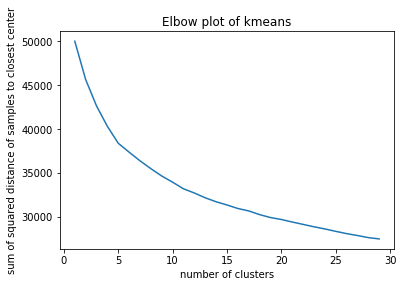

In [77]:
# kmeans
distance=[]
for i in range(1,30):
    km=KMeans(n_clusters=i,max_iter=300,n_init=10,random_state=120)
    km.fit(num_std)
    print(km.inertia_)
    distance.append(km.inertia_) 
    # inertia is Sum of squared distances of samples to their closest cluster center.
plt.plot(range(1,30),distance)
plt.title('Elbow plot of kmeans')
plt.xlabel('number of clusters')
plt.ylabel('sum of squared distance of samples to closest center')
plt.show()

In [78]:
# just try k=5 
km=KMeans(n_clusters=2,init='k-means++',max_iter=300,n_init=10,random_state=120)
y_pred=km.fit_predict(num_std)
x=np.array(num_std)

In [79]:
y_cluster=pd.DataFrame(y_pred)

In [80]:

confusion_matrix(y, y_cluster)

array([[1375, 1475],
       [ 282,  201]], dtype=int64)

In [81]:

accuracy_score(y, y_cluster)

0.47284728472847287

### UMAP

In [82]:
# visualize using umap
umap_results = umap.UMAP(n_neighbors=8,
                      min_dist=0.3,
                      metric='correlation').fit_transform(x)

In [83]:
x

array([[ 0.67648946,  1.23488274,  1.56676695, ..., -0.60119509,
        -0.0856905 , -0.42793202],
       [ 0.14906505,  1.30794844, -0.33373776, ..., -0.60119509,
         1.2411686 , -0.42793202],
       [ 0.9025285 , -0.59175986,  1.16830364, ...,  0.21153386,
         0.69715637, -1.1882185 ],
       ...,
       [-1.83505538, -0.59175986,  0.01881963, ...,  0.61789834,
         1.3871231 ,  0.33235445],
       [ 2.08295458, -0.59175986,  0.62477766, ...,  2.24335625,
        -1.87695028,  0.33235445],
       [-0.67974475,  1.23488274,  1.00304237, ..., -0.19483061,
         1.2411686 , -1.1882185 ]])

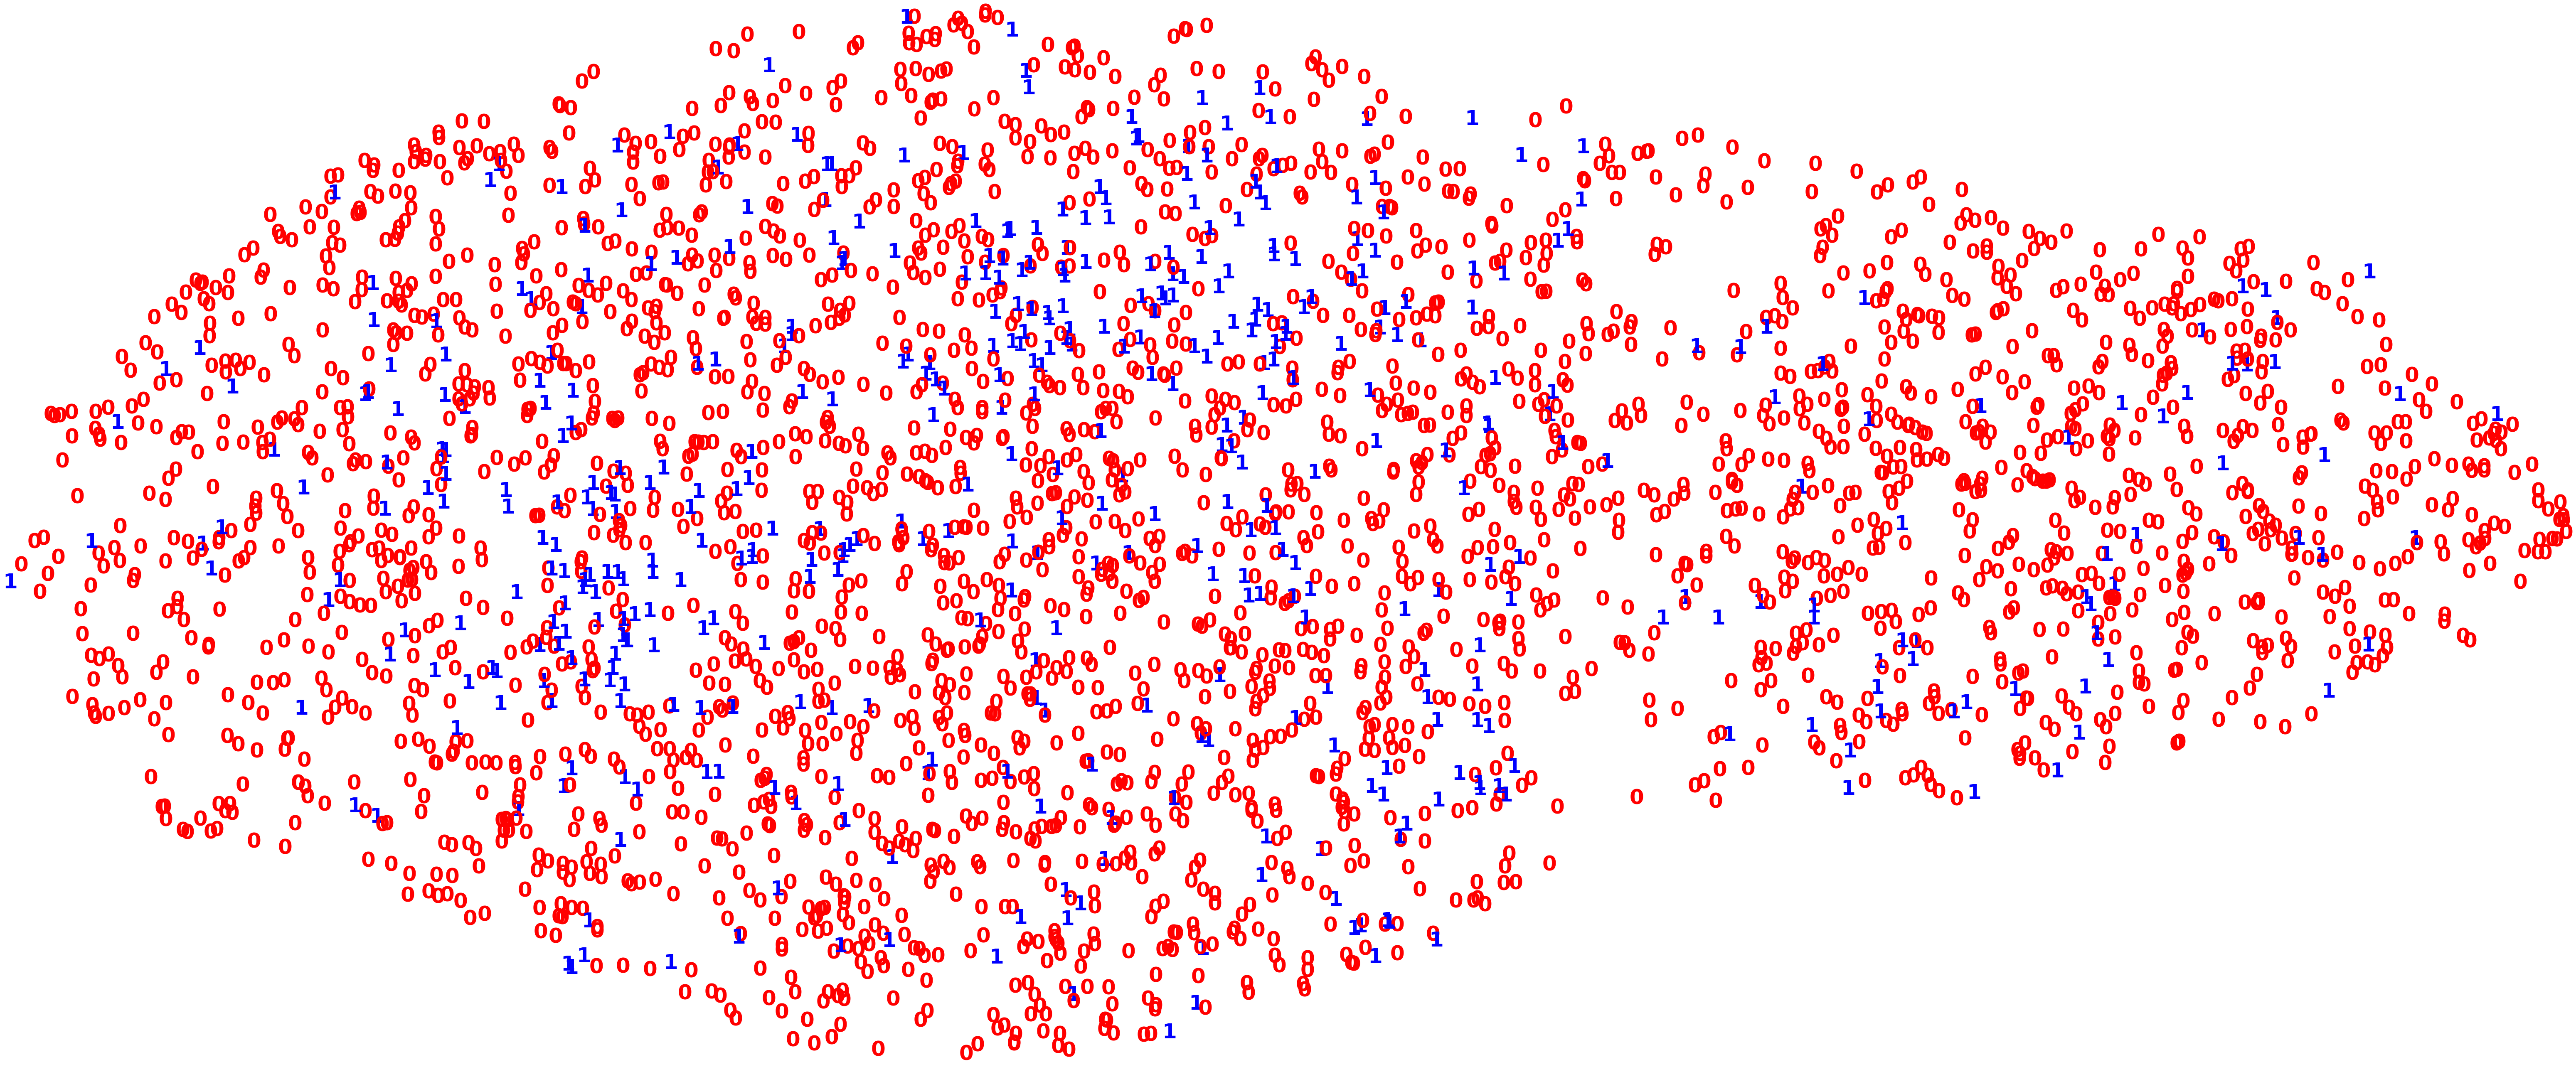

In [84]:
plt.figure(figsize=(10,5))
colours = ["r","b"]
for i in range(umap_results.shape[0]):
    plt.text(umap_results[i, 0], umap_results[i, 1], y[i],
             color=colours[int(y[i])],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

Text(0.5, 0, '')

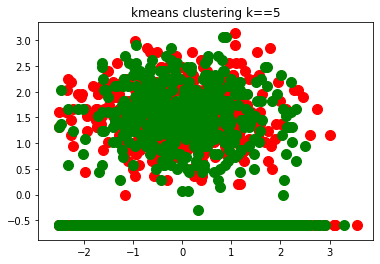

In [85]:
plt.scatter(x[y_pred==0,0],x[y_pred==0,1],s=100,c='red',label='miser')
plt.scatter(x[y_pred==1,0],x[y_pred==1,1],s=100,c='green',label='general')

plt.title('kmeans clustering k==5')
plt.xlabel('')


### Boostrapping for imbalanced data

Dealing with imbalanced data using bootstrapping method

In [86]:
# using bootstrapping randomly select a certain number of rows from each group and deal with imbalanced issue
# randomly select same number of rows from group churn and group not-churn
# For churn group, since this is the minority group, so I will set bootstrapping parameter to True to the minority group here to balance the number
churn_1_bootstrap=churn_1.sample(1000,replace=True)
churn_0_bootstrap=churn_0.sample(1000,replace=False)

Now the new dataset for training consists of churn_1_bootstrap and churn_0_bootstrap two parts.I will concat this two parts together and shuffle them to make it random.

In [87]:
bootstrap_df=pd.concat([churn_1_bootstrap,churn_0_bootstrap],axis=0)

In [88]:
bootstrap_df

state  account length  area code phone number international plan  \
57      CO             121        408     370-7574                 no   
1731    TX              70        415     341-8719                 no   
2700    SC             209        510     388-7540                 no   
1337    WY              97        510     346-1629                yes   
2594    OH             115        510     348-1163                yes   
430     KS              46        510     365-5979                 no   
2773    NJ             134        510     373-3959                 no   
1651    CT              64        415     406-9926                yes   
985     NY              64        415     345-9140                yes   
2774    ME              62        415     358-1346                yes   
3301    CA              84        415     417-1488                 no   
2994    VT             128        408     344-1362                 no   
1653    MD              93        510     384-3299                yes   
54      WY              87        415     353-3759                 no   
771     WI             149        415     339-6637                yes   
3304    IL              71        510     330-7137                yes   
2402    NY              77        415     388-9285                 no   
580     IN             113        415     353-6007                 no   
721     UT             103        510     327-3587                 no   
830     CO             121        408     409-4447                yes   
2828    MS             123        415     388-8948                yes   
2428    MN              40        510     350-7114                 no   
2118    TX              37        510     346-2020                yes   
1849    PA             119        408     342-4122                 no   
2681    SC             121        415     415-6347                 no   
1493    MT             126        415     344-3466                 no   
416     DE             224        510     361-6563                yes   
2539    OR             138        415     384-7236                yes   
613     NV             105        415     380-7742                yes   
2784    MD             119        408     401-9665                 no   
...    ...             ...        ...          ...                ...   
324     VA             129        408     384-2632                 no   
2496    MT             143        408     385-2699                 no   
68      UT             126        408     338-9472                 no   
2753    OH             134        415     406-4158                 no   
1606    CT              95        415     392-5941                 no   
386     CT              99        415     363-8824                 no   
2295    OR             190        415     386-8984                 no   
1640    TN              68        415     397-1659                 no   
1168    NV             143        408     393-5284                 no   
2770    NH              84        408     409-5749                 no   
22      AZ             130        415     358-1958                 no   
201     DE              62        408     377-9932                 no   
581     PA             171        415     416-1557                 no   
2723    HI             101        415     390-5316                 no   
3081    NY             204        415     371-9414                 no   
2381    WV              64        415     357-2748                 no   
2840    NJ             108        415     333-1012                 no   
2086    WY             146        408     348-3581                 no   
2080    MO             109        415     389-4695                 no   
169     AL              32        510     404-9680                 no   
1895    HI              86        408     398-3004                 no   
2184    ID              92        415     405-4606                 no   
1461    SC             145        408     377-6635             

In [89]:
# shuffle the data
bootstrap_df = bootstrap_df.sample(frac=1).reset_index(drop=True)

In [90]:
bootstrap_df= bootstrap_df.drop(['state','area code','phone number'],axis=1)

In [91]:
bootstrap_df.head()

account length international plan voice mail plan  number vmail messages  \
0             130                 no              no                      0   
1             141                 no             yes                     32   
2              92                 no             yes                     44   
3              24                 no              no                      0   
4              99                 no             yes                     33   

   total day minutes  total day calls  total day charge  total eve minutes  \
0              212.8              102             36.18              189.8   
1              322.4               92             54.81              283.2   
2              152.0               95             25.84              274.9   
3              149.0               73             25.33              131.0   
4              179.1               93             30.45              238.3   

   total eve calls  total eve charge  total night minutes  total night calls  \
0              137             16.13                170.1                105   
1              107             24.07                209.5                111   
2               73             23.37                162.4                121   
3               81             11.14                238.6                 69   
4              102             20.26                165.7                 96   

   total night charge  total intl minutes  total intl calls  \
0                7.65                10.6                 4   
1                9.43                 6.7                 3   
2                7.31                10.0                 1   
3               10.74                 8.6                 3   
4                7.46                10.6                 1   

   total intl charge  customer service calls  churn  
0               2.86                       0   True  
1               1.81                       1   True  
2               2.70                       2  False  
3               2.32                       2   True  
4               2.86                       2  False

In [92]:
# convert the categorical columns into binary
bootstrap_df['voice mail plan']=pd.Series(np.where(bootstrap_df['voice mail plan'].values == 'yes', 1, 0),bootstrap_df.index)

In [93]:
bootstrap_df['international plan']=pd.Series(np.where(bootstrap_df['international plan'].values == 'yes', 1, 0),bootstrap_df.index)

In [94]:
X_train=bootstrap_df.iloc[:,:-1]
y_train=bootstrap_df.iloc[:,-1]

In [95]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
account length            2000 non-null int64
international plan        2000 non-null int32
voice mail plan           2000 non-null int32
number vmail messages     2000 non-null int64
total day minutes         2000 non-null float64
total day calls           2000 non-null int64
total day charge          2000 non-null float64
total eve minutes         2000 non-null float64
total eve calls           2000 non-null int64
total eve charge          2000 non-null float64
total night minutes       2000 non-null float64
total night calls         2000 non-null int64
total night charge        2000 non-null float64
total intl minutes        2000 non-null float64
total intl calls          2000 non-null int64
total intl charge         2000 non-null float64
customer service calls    2000 non-null int64
dtypes: float64(8), int32(2), int64(7)
memory usage: 250.1 KB


Since there are repeated rows appeared in the bootstrap_df after balanced up, so I will use original dataset for testing to reduce the bias from bootstrapping replacment rows

In [96]:
test_data=tel_cus.drop(['state','area code','phone number'],axis=1)

In [97]:
test_data['voice mail plan']=pd.Series(np.where(test_data['voice mail plan'].values == 'yes', 1, 0),test_data.index)

test_data['international plan']=pd.Series(np.where(test_data['international plan'].values == 'yes', 1, 0),test_data.index)

In [176]:
X_test=test_data.iloc[:,:-1]
y_test=test_data.iloc[:,-1]

In [99]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 17 columns):
account length            3333 non-null int64
international plan        3333 non-null int32
voice mail plan           3333 non-null int32
number vmail messages     3333 non-null int64
total day minutes         3333 non-null float64
total day calls           3333 non-null int64
total day charge          3333 non-null float64
total eve minutes         3333 non-null float64
total eve calls           3333 non-null int64
total eve charge          3333 non-null float64
total night minutes       3333 non-null float64
total night calls         3333 non-null int64
total night charge        3333 non-null float64
total intl minutes        3333 non-null float64
total intl calls          3333 non-null int64
total intl charge         3333 non-null float64
customer service calls    3333 non-null int64
dtypes: float64(8), int32(2), int64(7)
memory usage: 416.7 KB


### Logitstic Regression on Bootstrapping data

In [100]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\Yinan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [101]:
y_pred = logreg.predict(X_test)

In [102]:
confusion_matrix(y_test,y_pred)

array([[1918,  932],
       [ 140,  343]], dtype=int64)

In [103]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.67      0.78      2850
           1       0.27      0.71      0.39       483

    accuracy                           0.68      3333
   macro avg       0.60      0.69      0.59      3333
weighted avg       0.84      0.68      0.72      3333



From the logistic regression testing result to see, this method performas okay to identify churn=1 customers. 139 out of (139+344) which is 28.7% error rate

Let's try other classification to see how is this bootstrapping doing

#### KNN with Bootstrapping data

In [104]:

knn_model = KNeighborsClassifier()

param_grid = {'n_neighbors': np.arange(5,19, step=2), 
              'weights':['uniform', 'distance'],
             'metric':['euclidean','manhattan']}

cv = ShuffleSplit(n_splits=5, test_size=0.3)

grid_search = GridSearchCV(knn_model, param_grid, cv=cv)

grid_search.fit(X_train, y_train) 

print(grid_search.best_params_)
print(grid_search.best_score_)

{'metric': 'manhattan', 'n_neighbors': 17, 'weights': 'distance'}
0.8246666666666667


In [ ]:
# maybe try tunning every parameters if knn is the best

In [105]:
knn_model_bootstrap= KNeighborsClassifier(
             n_neighbors=17, 
              weights='distance',
             metric='manhattan')

In [106]:
knn_model_bootstrap.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=17, p=2,
                     weights='distance')

In [107]:
y_pred=knn_model_bootstrap.predict(X_test)

In [108]:
confusion_matrix(y_test,y_pred)

array([[2382,  468],
       [  28,  455]], dtype=int64)

In [109]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.84      0.91      2850
           1       0.49      0.94      0.65       483

    accuracy                           0.85      3333
   macro avg       0.74      0.89      0.78      3333
weighted avg       0.92      0.85      0.87      3333



This is KNN gridsearch cv result is really good comparing to logistic regression result earlier. Since I will use another method for dealing with imbalanced data issue, so I just want to say KNN with GridSearch CV is the best model so far. 
The accuracy over all data is 85%, and the accuracy of identifying churn customer is 94%. Pretty good!!

### SVM with Bootstrapping data

In [110]:

svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [112]:
predictions = svclassifier.predict(X_test) 
print(classification_report(y_test, predictions)) 

              precision    recall  f1-score   support

           0       0.95      0.76      0.85      2850
           1       0.36      0.79      0.49       483

    accuracy                           0.76      3333
   macro avg       0.66      0.77      0.67      3333
weighted avg       0.87      0.76      0.79      3333



In [113]:
param_grid = {'C': [0.5,1, 0.2],  
              'gamma': [0.1, 1, 0.2], 
              'kernel': ['rbf','linear','sigmoid'],
             'class_weight':[ None,'balanced']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 

In [114]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] C=0.5, class_weight=None, gamma=0.1, kernel=rbf .................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=0.5, class_weight=None, gamma=0.1, kernel=rbf, score=0.708, total=   0.3s
[CV] C=0.5, class_weight=None, gamma=0.1, kernel=rbf .................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  C=0.5, class_weight=None, gamma=0.1, kernel=rbf, score=0.757, total=   0.2s
[CV] C=0.5, class_weight=None, gamma=0.1, kernel=rbf .................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


[CV]  C=0.5, class_weight=None, gamma=0.1, kernel=rbf, score=0.760, total=   0.2s
[CV] C=0.5, class_weight=None, gamma=0.1, kernel=rbf .................
[CV]  C=0.5, class_weight=None, gamma=0.1, kernel=rbf, score=0.752, total=   0.3s
[CV] C=0.5, class_weight=None, gamma=0.1, kernel=rbf .................
[CV]  C=0.5, class_weight=None, gamma=0.1, kernel=rbf, score=0.755, total=   0.3s
[CV] C=0.5, class_weight=None, gamma=0.1, kernel=linear ..............
[CV]  C=0.5, class_weight=None, gamma=0.1, kernel=linear, score=0.770, total=  17.5s
[CV] C=0.5, class_weight=None, gamma=0.1, kernel=linear ..............
[CV]  C=0.5, class_weight=None, gamma=0.1, kernel=linear, score=0.797, total=  11.0s
[CV] C=0.5, class_weight=None, gamma=0.1, kernel=linear ..............
[CV]  C=0.5, class_weight=None, gamma=0.1, kernel=linear, score=0.750, total=   9.9s
[CV] C=0.5, class_weight=None, gamma=0.1, kernel=linear ..............
[CV]  C=0.5, class_weight=None, gamma=0.1, kernel=linear, score=0.748, to

[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed: 34.4min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.5, 1, 0.2], 'class_weight': [None, 'balanced'],
                         'gamma': [0.1, 1, 0.2],
                         'kernel': ['rbf', 'linear', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [160]:
print(grid.best_params_)

{'C': 1, 'class_weight': None, 'gamma': 0.1, 'kernel': 'rbf'}


In [161]:
print(grid.best_estimator_)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [175]:
X_train.shape[1]

16

In [187]:
SVC_pred=grid.predict(X_test)

In [188]:
SVC_pred=pd.DataFrame(SVC_pred)

In [189]:
SVC_pred=pd.Series(np.where(SVC_pred.values == 'True', 1, 0),SVC_pred.index)

C:\Users\Yinan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



In [190]:
SVC_pred

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
3303    0
3304    0
3305    0
3306    0
3307    0
3308    0
3309    0
3310    0
3311    0
3312    0
3313    0
3314    0
3315    0
3316    0
3317    0
3318    0
3319    0
3320    0
3321    0
3322    0
3323    0
3324    0
3325    0
3326    0
3327    0
3328    0
3329    0
3330    0
3331    0
3332    0
Length: 3333, dtype: int32

In [191]:
print(classification_report(y_test,SVC_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92      2850
           1       0.00      0.00      0.00       483

    accuracy                           0.86      3333
   macro avg       0.43      0.50      0.46      3333
weighted avg       0.73      0.86      0.79      3333



C:\Users\Yinan\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



So far SVC model performance is the worst, this model can not identify any of the churn customers.

Now I will try to deal with imbalance issue with another method for make the two classes equal.

### Apply SMOTE for imbalanced data

Tackling data imbalance issue with SMOTE method

Apply SMOTE dealing with imbalance between churn and no churn

In [118]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from imblearn.over_sampling import SMOTE

imblearn has its own random forest to deal with imbalance

In [193]:
new_df2_nostate=pd.concat([categorical_new,num_df],axis=1)

In [194]:
new_df2_nostate=pd.concat([new_df2_nostate,y],axis=1)

In [195]:
new_df2_nostate=new_df2_nostate.iloc[:,1:]

In [196]:
y1=new_df2_nostate.iloc[:,-1]

In [197]:
X=new_df2_nostate.iloc[:,:-1]

In [198]:
len(new_df2_nostate)

3333

In [199]:
np.bincount(y)

array([2850,  483], dtype=int64)

In [200]:
smt = SMOTE()
X_smote, y_smote = smt.fit_sample(X, y1)

In [201]:
np.bincount(y_smote)


array([2850, 2850], dtype=int64)

In [202]:
len(X_smote)

5700

### Re-apply Logistic Regression

In [203]:
# apply logstic regression again

X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.30, random_state=42)


logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\Yinan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [204]:
len(y_test)

1710

In [205]:
y_pred = logreg.predict(X_test)

In [206]:
print(len(y_pred))
print(len(y_test))

1710
1710


In [207]:
confusion_matrix(y_test,y_pred)

array([[558, 324],
       [235, 593]], dtype=int64)

In [208]:

accuracy_score(y_test,y_pred)

0.6730994152046783

In [209]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.63      0.67       882
           1       0.65      0.72      0.68       828

    accuracy                           0.67      1710
   macro avg       0.68      0.67      0.67      1710
weighted avg       0.68      0.67      0.67      1710



From the logistic regression result with smoted data, overall accuracy is 67%, and for accuracy identifying class=1 is 72%, which is fine comparing to other models I applied earlier.

### KNN with GridSearchCV Tuning

In [137]:

knn_model = KNeighborsClassifier()

param_grid = {'n_neighbors': np.arange(5,19, step=2), 
              'weights':['uniform', 'distance'],
             'metric':['euclidean','manhattan']}

cv = ShuffleSplit(n_splits=5, test_size=0.3)

grid_search = GridSearchCV(knn_model, param_grid, cv=cv)

grid_search.fit(X_train, y_train) 

print(grid_search.best_params_)
print(grid_search.best_score_)
                                 
# gridsearch on KNN to pick out the best parameters

{'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
0.8213868003341688


In [138]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
0.8213868003341688


In [139]:
# This result from knn grid search is pretty good comparing to previous result.
# let's test it on test data

In [140]:
knn_model_best= KNeighborsClassifier(
             n_neighbors=5, 
              weights='distance',
             metric='manhattan')

In [141]:
knn_model_best.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [142]:
y_pred=knn_model_best.predict(X_test)

In [143]:
# groupby original data based on y_pred
# look at customer calls from this model, check if 4 calls is the tipping point
# have question on this part????

In [144]:
confusion_matrix(y_test,y_pred)

array([[606, 276],
       [  6, 822]], dtype=int64)

In [145]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.69      0.81       882
           1       0.75      0.99      0.85       828

    accuracy                           0.84      1710
   macro avg       0.87      0.84      0.83      1710
weighted avg       0.87      0.84      0.83      1710



In [239]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3990 entries, 309 to 860
Data columns (total 16 columns):
international plan        3990 non-null int32
account length            3990 non-null int64
number vmail messages     3990 non-null int64
total day minutes         3990 non-null float64
total day calls           3990 non-null int64
total day charge          3990 non-null float64
total eve minutes         3990 non-null float64
total eve calls           3990 non-null int64
total eve charge          3990 non-null float64
total night minutes       3990 non-null float64
total night calls         3990 non-null int64
total night charge        3990 non-null float64
total intl minutes        3990 non-null float64
total intl calls          3990 non-null int64
total intl charge         3990 non-null float64
customer service calls    3990 non-null int64
dtypes: float64(8), int32(1), int64(7)
memory usage: 514.3 KB


In [236]:
from sklearn.model_selection import cross_val_score

In [237]:
n_feats = X_test.shape[1]

print('Feature  Accuracy')
for i in range(n_feats):
    X = X_train.iloc[:, i].values.reshape(-1, 1)
    scores = cross_val_score(knn_model_best, X, y_train, cv=3)
    print(f'{i}        {scores.mean():g}')

Feature  Accuracy
0        0.494987
1        0.519549
2        0.534837
3        0.643609
4        0.518546
5        0.650877
6        0.585714
7        0.509273
8        0.592732
9        0.583709
10        0.501754
11        0.656391
12        0.826316
13        0.554135
14        0.83985
15        0.530827


From the feature importance list to see feature 14 and feature 12 have high importance score comparing to other features  . In original data features, these features are.
The most important two features are total international minutes and total night charge. 
For further use of business purpose, company can work on increase international package to attract customer back to business. At the same time, company should try to find a way reduce the night charge of those potential churn customers and customers who will churn in the future, in order to keep more customer stay with business. 

For further finance analysis based on this model, study of finding relationshipo between decreaing night call charge and revenue, and relationship between international package price and revenue. If there might be case of even decreasing the night call charge, less customers churn rate but on the contratry revenue decreases at the same time, financial study combined with customer churn study should be conducted necessarily.

From the knn best model features list to see, customer service call is not the most important features.

In [244]:
churn_1.describe()

account length   area code  number vmail messages  total day minutes  \
count      483.000000  483.000000             483.000000         483.000000   
mean       102.664596  437.817805               5.115942         206.914079   
std         39.467820   42.792270              11.860138          68.997792   
min          1.000000  408.000000               0.000000           0.000000   
25%         76.000000  408.000000               0.000000         153.250000   
50%        103.000000  415.000000               0.000000         217.600000   
75%        127.000000  510.000000               0.000000         265.950000   
max        225.000000  510.000000              48.000000         350.800000   

       total day calls  total day charge  total eve minutes  total eve calls  \
count       483.000000        483.000000         483.000000       483.000000   
mean        101.335404         35.175921         212.410145       100.561077   
std          21.582307         11.729710          51.728910        19.724711   
min           0.000000          0.000000          70.900000        48.000000   
25%          87.500000         26.055000         177.100000        87.000000   
50%         103.000000         36.990000         211.300000       101.000000   
75%         116.500000         45.210000         249.450000       114.000000   
max         165.000000         59.640000         363.700000       168.000000   

       total eve charge  total night minutes  total night calls  \
count        483.000000           483.000000         483.000000   
mean          18.054969           205.231677         100.399586   
std            4.396762            47.132825          19.950659   
min            6.030000            47.400000          49.000000   
25%           15.055000           171.250000          85.000000   
50%           17.960000           204.800000         100.000000   
75%           21.205000           239.850000         115.000000   
max           30.910000           354.900000         158.000000   

       total night charge  total intl minutes  total intl calls  \
count          483.000000           483.00000        483.000000   
mean             9.235528            10.70000          4.163561   
std              2.121081             2.79319          2.551575   
min              2.130000             2.00000          1.000000   
25%              7.705000             8.80000          2.000000   
50%              9.220000            10.60000          4.000000   
75%             10.795000            12.80000          5.000000   
max             15.970000            20.00000         20.000000   

       total intl charge  customer service calls  
count         483.000000              483.000000  
mean            2.889545                2.229814  
std             0.754152                1.853275  
min             0.540000                0.000000  
25%             2.380000                1.000000  
50%             2.860000                2.000000  
75%             3.460000                4.000000  
max             5.400000                9.000000

In [245]:
churn_0.describe()

account length    area code  number vmail messages  total day minutes  \
count     2850.000000  2850.000000            2850.000000        2850.000000   
mean       100.793684   437.074737               8.604561         175.175754   
std         39.882350    42.306156              13.913125          50.181655   
min          1.000000   408.000000               0.000000           0.000000   
25%         73.000000   408.000000               0.000000         142.825000   
50%        100.000000   415.000000               0.000000         177.200000   
75%        127.000000   510.000000              22.000000         210.300000   
max        243.000000   510.000000              51.000000         315.600000   

       total day calls  total day charge  total eve minutes  total eve calls  \
count      2850.000000       2850.000000        2850.000000      2850.000000   
mean        100.283158         29.780421         199.043298       100.038596   
std          19.801157          8.530835          50.292175        19.958414   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.282500         164.500000        87.000000   
50%         100.000000         30.120000         199.600000       100.000000   
75%         114.000000         35.750000         233.200000       114.000000   
max         163.000000         53.650000         361.800000       170.000000   

       total eve charge  total night minutes  total night calls  \
count       2850.000000          2850.000000        2850.000000   
mean          16.918909           200.133193         100.058246   
std            4.274863            51.105032          19.506246   
min            0.000000            23.200000          33.000000   
25%           13.980000           165.900000          87.000000   
50%           16.970000           200.250000         100.000000   
75%           19.820000           234.900000         113.000000   
max           30.750000           395.000000         175.000000   

       total night charge  total intl minutes  total intl calls  \
count         2850.000000         2850.000000       2850.000000   
mean             9.006074           10.158877          4.532982   
std              2.299768            2.784489          2.441984   
min              1.040000            0.000000          0.000000   
25%              7.470000            8.400000          3.000000   
50%              9.010000           10.200000          4.000000   
75%             10.570000           12.000000          6.000000   
max             17.770000           18.900000         19.000000   

       total intl charge  customer service calls  
count        2850.000000             2850.000000  
mean            2.743404                1.449825  
std             0.751784                1.163883  
min             0.000000                0.000000  
25%             2.270000                1.000000  
50%             2.750000                1.000000  
75%             3.240000                2.000000  
max             5.100000                8.000000

From the two tables above comparing churn group and not-churn group, customer calls are almost the same value, so it concludes customer calls is not the big factor here.

In general to say, churn group has higher day call charge, and slightly high customer service calls. This means company needs to work on reduce the day call charge for those churn customer or future potential churn customers.

t-test needs to be applied on the two sets of data from class 1 and class 2 for some features

In [247]:
stats.ttest_ind(churn_1['total day charge'], churn_0['total day charge'], equal_var = False)

Ttest_indResult(statistic=9.684475930233658, pvalue=1.2198763860802676e-20)

In [251]:
list= ['total day charge', 'total night charge','total day minutes','total intl charge', 'total intl minutes','customer service calls']

for var in list:
    print('t-test on feature {}'.format(var))
    print(stats.ttest_ind(churn_1[var], churn_0[var], equal_var = False))

t-test on feature total day charge
Ttest_indResult(statistic=9.684475930233658, pvalue=1.2198763860802676e-20)
t-test on feature total night charge
Ttest_indResult(statistic=2.171006887437526, pvalue=0.030271539217208626)
t-test on feature total day minutes
Ttest_indResult(statistic=9.684562957319736, pvalue=1.2189683063650911e-20)
t-test on feature total intl charge
Ttest_indResult(statistic=3.939933040077332, pvalue=9.025886559180106e-05)
t-test on feature total intl minutes
Ttest_indResult(statistic=3.9388511152723553, pvalue=9.065714718803045e-05)
t-test on feature customer service calls
Ttest_indResult(statistic=8.95514138244338, pvalue=5.270040385717215e-18)


t-test on all columns of numeric columns

In [264]:
num_df=tel_cus.select_dtypes(exclude='object')

In [265]:
num_1=num_df[num_df['churn']==1]

In [266]:
num_0=num_df[num_df['churn']==0]

In [268]:
total_list=num_0.columns

In [270]:
# Here I will conduct t-test on all columns 
for var in total_list:
    print('t-test on feature {}'.format(var))
    print(stats.ttest_ind(num_1[var], num_0[var], equal_var = False))
    print('   ')

t-test on feature account length
Ttest_indResult(statistic=0.9618893197561772, pvalue=0.33645751767927445)
   
t-test on feature area code
Ttest_indResult(statistic=0.3534711187781604, pvalue=0.7238495576665369)
   
t-test on feature number vmail messages
Ttest_indResult(statistic=-5.821253623286179, pvalue=8.76478218022036e-09)
   
t-test on feature total day minutes
Ttest_indResult(statistic=9.684562957319736, pvalue=1.2189683063650911e-20)
   
t-test on feature total day calls
Ttest_indResult(statistic=1.0023867230811039, pvalue=0.316543431358623)
   
t-test on feature total day charge
Ttest_indResult(statistic=9.684475930233658, pvalue=1.2198763860802676e-20)
   
t-test on feature total eve minutes
Ttest_indResult(statistic=5.272354178713746, pvalue=1.8390798282238121e-07)
   
t-test on feature total eve calls
Ttest_indResult(statistic=0.537388864584388, pvalue=0.5911800500990859)
   
t-test on feature total eve charge
Ttest_indResult(statistic=5.271985823981345, pvalue=1.842607543

Based on knn model feature importance list and the t-tests for all the numeric columns , it's easy to see number of vmail message, total day minutes, total day charge, total eve minutes, total eve charge, total night charge, total intl minutes, total intl charge, customer service calls are signicnatly different base on class 1 and class 0.

This result confirmed with earlier KNN model feature importance list result. Total night charge is definitely a feature impacting churning rate.

Telecommunication company needs to pay attention to day charge, night charge and international charge to prevent customer abandon the service in the future.

Attention: 

Because SMOTE created Synthetic data mixed in the original data, so it's better test the model with original which is imbalanced.
Now use this new knn to apply on raw original dataset, to see how it works, with imbalanced in it.

In [146]:
new_df2_nostate.head() # removed state column

international plan  account length  number vmail messages  \
0                   0             128                     25   
1                   0             107                     26   
2                   0             137                      0   
3                   1              84                      0   
4                   1              75                      0   

   total day minutes  total day calls  total day charge  total eve minutes  \
0              265.1              110             45.07              197.4   
1              161.6              123             27.47              195.5   
2              243.4              114             41.38              121.2   
3              299.4               71             50.90               61.9   
4              166.7              113             28.34              148.3   

   total eve calls  total eve charge  total night minutes  total night calls  \
0               99             16.78                244.7                 91   
1              103             16.62                254.4                103   
2              110             10.30                162.6                104   
3               88              5.26                196.9                 89   
4              122             12.61                186.9                121   

   total night charge  total intl minutes  total intl calls  \
0               11.01                10.0                 3   
1               11.45                13.7                 3   
2                7.32                12.2                 5   
3                8.86                 6.6                 7   
4                8.41                10.1                 3   

   total intl charge  customer service calls  churn  
0               2.70                       1      0  
1               3.70                       1      0  
2               3.29                       0      0  
3               1.78                       2      0  
4               2.73                       3      0

#### Test best KNN model with original data with imbalance in it

In [147]:
# so I will randomly select 1710 samples from original data

df_test_original = new_df2_nostate.sample(n=1710)
X_original=df_test_original.iloc[:,:-1]
y_original=df_test_original.iloc[:,-1]

In [148]:
df_test_original.head(10)

international plan  account length  number vmail messages  \
2803                   0             104                      0   
2884                   0             170                      0   
2008                   0              86                     33   
231                    1              63                     36   
1504                   0              65                      0   
2796                   0              24                      0   
23                     0             111                      0   
2949                   1             155                      0   
131                    0              75                      0   
1985                   0             101                     16   

      total day minutes  total day calls  total day charge  total eve minutes  \
2803              264.0              108             44.88              132.2   
2884              285.7               44             48.57              167.5   
2008              253.1              112             43.03              210.1   
231               199.0              110             33.83              291.3   
1504              153.9              117             26.16              220.1   
2796              235.6              132             40.05              115.9   
23                110.4              103             18.77              137.3   
2949              250.8              146             42.64              152.5   
131               166.3              125             28.27              158.2   
1985              118.9              112             20.21              228.3   

      total eve calls  total eve charge  total night minutes  \
2803               75             11.24                177.7   
2884              144             14.24                260.0   
2008               94             17.86                 95.0   
231               111             24.76                197.6   
1504              122             18.71                280.5   
2796              129              9.85                185.4   
23                102             11.67                189.6   
2949              105             12.96                148.1   
131                86             13.45                256.7   
1985               97             19.41                180.1   

      total night calls  total night charge  total intl minutes  \
2803                 91                8.00                10.6   
2884                 97               11.70                 8.7   
2008                 98                4.27                11.9   
231                  92                8.89                11.0   
1504                147               12.62                 8.5   
2796                136                8.34                16.2   
23                  105                8.53                 7.7   
2949                104                6.66                10.0   
131                  80               11.55                 6.1   
1985                111                8.10                 8.2   

      total intl calls  total intl charge  customer service calls  churn  
2803                 8               2.86                       3      0  
2884                 4               2.35                       1      1  
2008                 4               3.21                       3      0  
231                  6               2.97                       1      0  
1504                 3               2.30                       2      0  
2796                 2               4.37                       0      0  
23                   6               2.08                       2      0  
2949                 5               2.70                       2      0  
131                  5               1.65                       1      0  
1985                 5               2.21                       2      0

In [149]:
# data before smote is new_df2_nostate
y_pred_knn=knn_model_best.predict(X_original)

In [150]:
y_pred_knn

array([0, 1, 0, ..., 0, 0, 0])

In [151]:
y_pred_knn=pd.DataFrame(y_pred_knn)

In [152]:
len(y_original)

1710

In [153]:
confusion_matrix(y_original,y_pred_knn)

array([[1310,  140],
       [   3,  257]], dtype=int64)

In [154]:
print(classification_report(y_original,y_pred_knn))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95      1450
           1       0.65      0.99      0.78       260

    accuracy                           0.92      1710
   macro avg       0.82      0.95      0.87      1710
weighted avg       0.94      0.92      0.92      1710



In [240]:
n_feats = X_original.shape[1]

print('Feature  Accuracy')
for i in range(n_feats):
    X = X_original.iloc[:, i].values.reshape(-1, 1)
    scores = cross_val_score(knn_model_best, X, y_original, cv=3)
    print(f'{i}        {scores.mean():g}')

Feature  Accuracy
0        0.847953
1        0.822222
2        0.846199
3        0.806433
4        0.829825
5        0.806433
6        0.778947
7        0.833333
8        0.781287
9        0.785965
10        0.833333
11        0.795322
12        0.819298
13        0.847368
14        0.819298
15        0.842105


In [155]:
knn_model_best.predict_proba(X_test)

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       ...,
       [0.        , 1.        ],
       [0.79709992, 0.20290008],
       [1.        , 0.        ]])

This results in 98% for churn group(only).

This is best result I got so far comparing to other models

This KNN model with tuned parameters is the best model so far, even performs better than KNN model with bootstrapping data. Overall accuracy is 92%, and accuracy of identifying class=1 is 99%, which means this model with smoted data can identify almost every churn customers. And this model can be used as the business model to predict churn customers in the future for telecommunication company, so even before any new churn customers appear, company should strategize some prevention to prevent customers churn or reduce the number of potential churn customers. This model is very usedful for guiding company business and marketing keeping customer around.

In [156]:
accuracy_score(y_test,y_pred)

0.8350877192982457

### Random Forest with GridSearchCV

In [220]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(random_state=45)


In [221]:
len(X_train)

3990

In [222]:
param_grid={
    'n_estimators':[50,250],
    'max_features':['auto','sqrt','log2'],
    'max_depth': [4,5,6,7,8],
    'criterion' : ['gini','entropy']
}

In [223]:
gscv_rfc=GridSearchCV(estimator=rfc,param_grid=param_grid,cv=5)
gscv_rfc.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=45,
                                  

In [224]:
gscv_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 50}

In [225]:
rfc_best=RandomForestClassifier(random_state=45,max_features='auto',n_estimators=150,max_depth=8,criterion='gini')

In [226]:
rfc_best.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=45, verbose=0,
                       warm_start=False)

In [227]:
y_pred=rfc_best.predict(X_original)

In [228]:
confusion_matrix(y_original,y_pred)

array([[1405,   45],
       [  32,  228]], dtype=int64)

In [229]:
print(classification_report(y_original,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1450
           1       0.84      0.88      0.86       260

    accuracy                           0.95      1710
   macro avg       0.91      0.92      0.91      1710
weighted avg       0.96      0.95      0.96      1710



From the result of random forest (sklearn model) I can see the overall accuracy0.95  is even better than best KNN model accuracy 0.92 earlier. But in terms of class 1 accuracy, KNN model still is the best model to identifying churn customers although the overall accuracy is not as good as random forest. 
Another stat worthy of looking is the f-score here, 0.86 which is better than knn best model which is 0.78. But  for both models, the f-scores are pretty good compaing to all other models in this project so far.

#### Imblearn library Built-in random forest classifier for imbalanced data

There is a built-in function in imblearn to dealing with imbalanced data so I will use the built-in function which is called "imblearn.ensemble.BalancedRandomForestClassifier" to train and test on original data with smote or bootstrapping at all. And comparing the imblearn built-in function result with RandomForestClassifier result.

In [272]:
from imblearn.ensemble import BalancedRandomForestClassifier

In [273]:
clf = BalancedRandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)
print(clf.feature_importances_)

[0.02834242 0.0003599  0.081874   0.22412672 0.00056287 0.31094463
 0.03118042 0.00051628 0.02948927 0.02177813 0.         0.01105258
 0.03331868 0.05451718 0.02676513 0.14517178]


In [274]:
y_pred=clf.predict(X_original)

In [275]:
y_pred

array([1, 1, 1, ..., 0, 0, 0])

In [276]:
print(classification_report(y_pred,y_original))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89      1316
           1       0.68      0.45      0.54       394

    accuracy                           0.83      1710
   macro avg       0.77      0.69      0.72      1710
weighted avg       0.81      0.83      0.81      1710



This builtin random forest classifier from library imblearn, doesn't give good performance regarding the overall accuracy and class 1 accuracy. So I will not comment much here.

### AdaboostClassifier with Tuning

In [281]:
from sklearn.ensemble import AdaBoostClassifier 

In [282]:
from sklearn.tree import DecisionTreeClassifier

param_grid={
    'n_estimators':[20,100,10],
    'learning_rate': [0.05,0.5,0.1],
    'algorithm':['SAMME', 'SAMME.R']
}

In [283]:
# AdaBoostClassifer(base_estimator=DecisionTreeClassifer())
# RandomForestClassifier()
#stacking models on top of each other

In [284]:
ada = AdaBoostClassifier(random_state=45)

# run grid search
grid_search_ada = GridSearchCV(ada, param_grid=param_grid, scoring = 'roc_auc')

In [285]:
new_df2_nostate['churn'].value_counts()

0    2850
1     483
Name: churn, dtype: int64

Split the original data first and then apply the smote to balanced it, and then use the smote data to train and use original data to test

In [286]:
# split the original data first and then apply smote
X2=new_df2_nostate.iloc[:,:-1]
y2=new_df2_nostate.iloc[:,-1]

In [287]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.30, random_state=42)

In [288]:
grid_search_ada

GridSearchCV(cv=None, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=45),
             iid='deprecated', n_jobs=None,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.05, 0.5, 0.1],
                         'n_estimators': [20, 100, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [289]:
smt = SMOTE()
X_smote, y_smote = smt.fit_sample(X_train, y_train)

In [290]:
model=grid_search_ada.fit(X_smote,y_smote)

In [291]:
y_pred=model.predict(X_test)

In [292]:
y_pred=pd.DataFrame(y_pred)

In [293]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.81      0.88       857
           1       0.42      0.80      0.55       143

    accuracy                           0.81      1000
   macro avg       0.69      0.81      0.72      1000
weighted avg       0.88      0.81      0.83      1000



In [294]:
confusion_matrix(y_test,y_pred)

array([[697, 160],
       [ 28, 115]], dtype=int64)

In [295]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.81      0.88       857
           1       0.42      0.80      0.55       143

    accuracy                           0.81      1000
   macro avg       0.69      0.81      0.72      1000
weighted avg       0.88      0.81      0.83      1000



In [296]:
tel_cus['churn'].value_counts()

0    2850
1     483
Name: churn, dtype: int64

### KPrototype Clustering( Original data without over samlping)

In [297]:
pip install kmodes

Note: you may need to restart the kernel to use updated packages.


In [298]:
# k-prototypes clustering for mixed variables(continious and categorical)
from kmodes import kmodes
from kmodes.kprototypes import KPrototypes
from matplotlib import style


In [299]:
X=tel_cus.iloc[:,:-1]

In [300]:
y=tel_cus.iloc[:,-1]

In [301]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
state                     3333 non-null object
account length            3333 non-null int64
area code                 3333 non-null int64
phone number              3333 non-null object
international plan        3333 non-null object
voice mail plan           3333 non-null object
number vmail messages     3333 non-null int64
total day minutes         3333 non-null float64
total day calls           3333 non-null int64
total day charge          3333 non-null float64
total eve minutes         3333 non-null float64
total eve calls           3333 non-null int64
total eve charge          3333 non-null float64
total night minutes       3333 non-null float64
total night calls         3333 non-null int64
total night charge        3333 non-null float64
total intl minutes        3333 non-null float64
total intl calls          3333 non-null int64
total intl charge         3333 non-null float64

In [302]:
X

state  account length  area code phone number international plan  \
0       KS             128        415     382-4657                 no   
1       OH             107        415     371-7191                 no   
2       NJ             137        415     358-1921                 no   
3       OH              84        408     375-9999                yes   
4       OK              75        415     330-6626                yes   
5       AL             118        510     391-8027                yes   
6       MA             121        510     355-9993                 no   
7       MO             147        415     329-9001                yes   
8       LA             117        408     335-4719                 no   
9       WV             141        415     330-8173                yes   
10      IN              65        415     329-6603                 no   
11      RI              74        415     344-9403                 no   
12      IA             168        408     363-1107                 no   
13      MT              95        510     394-8006                 no   
14      IA              62        415     366-9238                 no   
15      NY             161        415     351-7269                 no   
16      ID              85        408     350-8884                 no   
17      VT              93        510     386-2923                 no   
18      VA              76        510     356-2992                 no   
19      TX              73        415     373-2782                 no   
20      FL             147        415     396-5800                 no   
21      CO              77        408     393-7984                 no   
22      AZ             130        415     358-1958                 no   
23      SC             111        415     350-2565                 no   
24      VA             132        510     343-4696                 no   
25      NE             174        415     331-3698                 no   
26      WY              57        408     357-3817                 no   
27      MT              54        408     418-6412                 no   
28      MO              20        415     353-2630                 no   
29      HI              49        510     410-7789                 no   
...    ...             ...        ...          ...                ...   
3303    WI             114        415     373-7308                 no   
3304    IL              71        510     330-7137                yes   
3305    IN              58        415     406-8445                 no   
3306    AL             106        408     404-5283                 no   
3307    OK             172        408     398-3632                 no   
3308    IA              45        415     399-5763                 no   
3309    VT             100        408     340-9449                yes   
3310    NY              94        415     363-1123                 no   
3311    LA             128        415     361-2170                 no   
3312    SC             181        408     406-6304                 no   
3313    ID             127        408     392-5090                 no   
3314    MO              89        415     373-7713                 no   
3315    ME             149        415     392-1376                 no   
3316    MS             103        510     390-6388                 no   
3317    SD             163        415     379-7290                yes   
3318    OK              52        415     397-9928                 no   
3319    WY              89        415     378-6924                 no   
3320    GA             122        510     411-5677                yes   
3321    VT              60        415     400-2738                 no   
3322    MD              62        408     409-1856                 no   
3323    IN             117        415     362-5899                 no   
3324    WV             159        415     377-1164                 no   
3325    OH              78        408     368-8555             

In [303]:
kproto=KPrototypes(n_clusters=2,init='Cao',verbose=2)
clusters=kproto.fit_predict(X,categorical=[0,3,4,5])

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 414, ncost: 37600682.41767642
Run: 1, iteration: 2/100, moves: 280, ncost: 37339910.3059983
Run: 1, iteration: 3/100, moves: 143, ncost: 37258161.95503864
Run: 1, iteration: 4/100, moves: 92, ncost: 37212374.0498099
Run: 1, iteration: 5/100, moves: 62, ncost: 37195434.57659037
Run: 1, iteration: 6/100, moves: 38, ncost: 37187314.31316094
Run: 1, iteration: 7/100, moves: 29, ncost: 37182945.96873142
Run: 1, iteration: 8/100, moves: 22, ncost: 37180485.80508986
Run: 1, iteration: 9/100, moves: 12, ncost: 37179785.69551093
Run: 1, iteration: 10/100, moves: 11, ncost: 37179116.87813465
Run: 1, iteration: 11/100, moves: 5, ncost: 37178962.852491155
Run: 1, iteration: 12/100, moves: 0, ncost: 37178962.852491155
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 491, ncost: 37944013.34524561
Run: 2, iteration: 2/100, mov

In [304]:
clusters

array([0, 1, 0, ..., 1, 0, 0], dtype=uint16)

In [305]:
pred_cluster=pd.DataFrame(clusters)

In [306]:

confusion_matrix(y,pred_cluster)

array([[1354, 1496],
       [ 290,  193]], dtype=int64)

In [307]:
accuracy_score(y,pred_cluster)

0.46414641464146417

In [308]:
print(kproto.cluster_centroids_)

[array([[102.03892944, 438.12530414,   8.19525547, 223.75973236,
        100.41849148,  38.03961071, 199.47883212, 100.34549878,
         16.955882  , 197.78625304, 100.63138686,   8.90041971,
         10.24495134,   4.47080292,   2.76673358,   1.53832117],
       [100.11663706, 436.26465364,   8.0053286 , 136.96234458,
        100.45233866,  23.28422143, 202.44185909,  99.8892836 ,
         17.20779751, 203.87560687,  99.59798697,   9.17452931,
         10.22984014,   4.48786264,   2.76248668,   1.58673771]]), array([['WV', '327-1319', 'no', 'no'],
       ['NY', '327-1058', 'no', 'no']], dtype='<U8')]


In [309]:
print(kproto.cost_)

37177991.50246936


In [310]:
print(kproto.n_iter_)

24


### GMM Clustering (only numeric columns)

Using only numeric data from original data

In [311]:
# using only numeric data to clustering
from sklearn.mixture import GaussianMixture

In [312]:
num_df=tel_cus.select_dtypes(exclude='object')

In [313]:
num_df_new=num_df.drop(['area code'],axis=1)

In [314]:
X_num=num_df_new.iloc[:,:-1]
y_num=num_df_new.iloc[:,-1]

In [315]:
type(X_num)

pandas.core.frame.DataFrame

In [316]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X_num)

In [317]:
gmm_cluster = GaussianMixture(n_components=2, random_state=105)

# Fit model
clusters = gmm_cluster.fit_predict(X_std)

In [318]:
clusters

array([1, 1, 0, ..., 0, 0, 1], dtype=int64)

In [319]:
clusters=pd.DataFrame(clusters)

In [320]:
confusion_matrix(y_num,clusters)

array([[2008,  842],
       [ 403,   80]], dtype=int64)

In [321]:
print(metrics.silhouette_score(X_std, clusters, metric='euclidean'))

C:\Users\Yinan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



0.08204872468946044


After applying GMM to the numeric columns, it shows GMM doesn't work well to clustering on numeric data, so I will keep searching for fit method to differentiate between churn group and not-churn group customers.

#### PCA Visualization

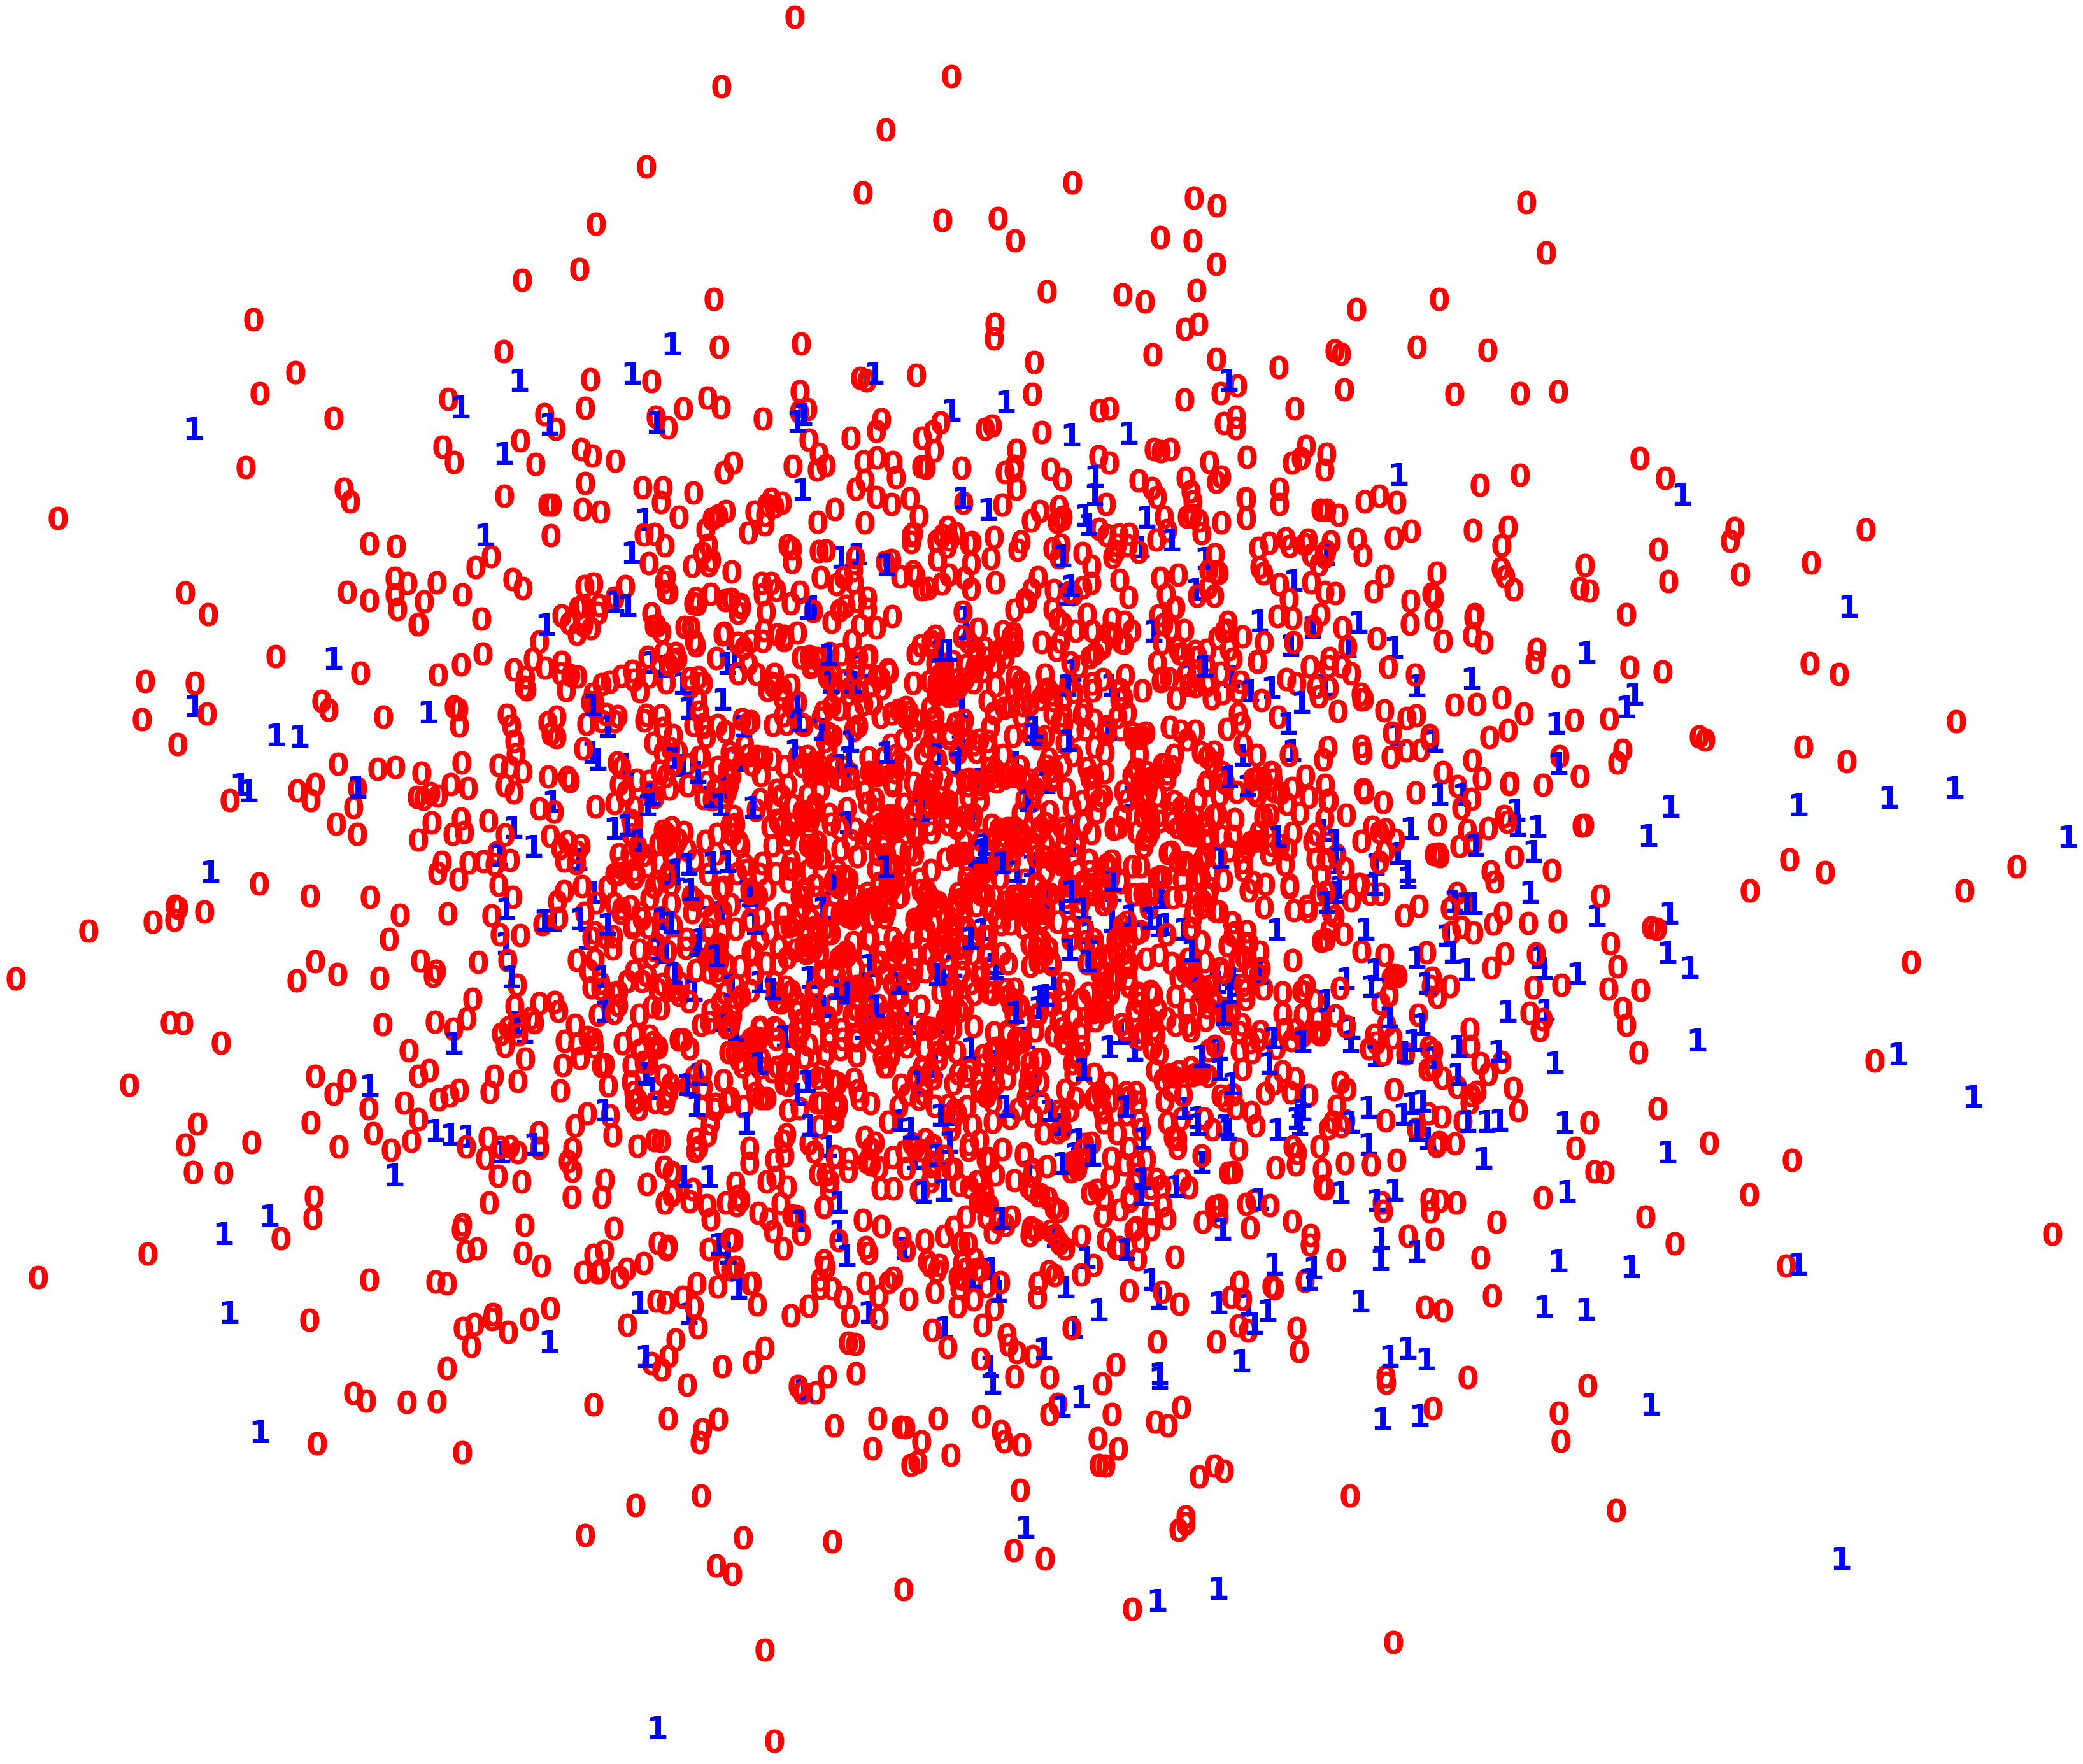

In [322]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2).fit_transform(X_std)


plt.figure(figsize=(6,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(y_num[i]),
             color=colours[int(y_num[i])],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

This PCA visualization doesn't show clear separation between two clusters as expected. But there is possibility of 2D plots can't show clusters because the data are in much higher dimension.

In [323]:
# calculate silhoutte score for evaluating clustering result

from sklearn import metrics

print(metrics.silhouette_score(X_std, clusters, metric='euclidean'))

C:\Users\Yinan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



0.08204872468946044


#### Re-apply KMeans for numeric data only

In [324]:
k_means = KMeans(n_clusters=2, random_state=123)
k_means.fit(X_std)
y_pred = k_means.predict(X_std)

In [325]:
y_pred=pd.DataFrame(y_pred)

In [326]:
confusion_matrix(y_num, y_pred)

array([[1461, 1389],
       [ 194,  289]], dtype=int64)

In [327]:
print(metrics.silhouette_score(X_std, y_pred, metric='euclidean'))

C:\Users\Yinan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



0.0836830486182496


### Clustering on only churn group

Idea of clustering only on churn group is to find out if there is possibility of convert any churn customers back to telecommunication so I guess there is difference between different types of customers even they are all in the churn group.
My assumption before clustering is to find if there is clear separation between different clusters of churn customers. In order to target churn customers in different ways and lure churcn customers back to service, it's worthy a try to cluster on churn group only and see how the results perform.

In [328]:
churn_0=tel_cus[tel_cus['churn']==0]
churn_1=tel_cus[tel_cus['churn']==1]

In [330]:
churn_1

state  account length  area code phone number international plan  \
10      IN              65        415     329-6603                 no   
15      NY             161        415     351-7269                 no   
21      CO              77        408     393-7984                 no   
33      AZ              12        408     360-1596                 no   
41      MD             135        408     383-6029                yes   
48      ID             119        415     398-1294                 no   
54      WY              87        415     353-3759                 no   
57      CO             121        408     370-7574                 no   
69      TX             150        510     374-8042                 no   
76      DC              82        415     374-5353                 no   
77      NY             144        408     360-1171                 no   
84      TX             106        510     395-3026                 no   
86      IN              94        408     402-1251                 no   
89      NJ             128        415     358-9095                 no   
91      LA             155        415     334-1275                 no   
98      MS             120        408     355-6291                 no   
99      ID              77        415     362-9748                 no   
115     ME              36        510     363-1069                yes   
117     NV              74        415     355-6837                 no   
126     MS             162        415     335-4858                 no   
127     MS              61        510     414-8718                 no   
144     VT             117        408     390-2390                yes   
156     OH              83        415     370-9116                 no   
181     AK             126        415     372-3750                 no   
197     TX             208        510     378-3625                 no   
198     ME             131        510     353-7292                yes   
214     FL              70        510     366-6345                yes   
218     MD             136        415     375-1476                 no   
230     MD              93        408     360-3324                yes   
235     MN             139        510     374-9107                 no   
...    ...             ...        ...          ...                ...   
3148    WA              60        415     366-8939                yes   
3151    ME              56        408     385-5688                 no   
3157    AR             127        415     416-3649                yes   
3166    AR              54        415     337-1586                 no   
3168    TX             201        415     415-5476                 no   
3169    ID              78        415     332-2650                 no   
3189    WA              76        510     345-6961                yes   
3190    ID             103        415     346-5992                 no   
3191    CT              87        415     402-3908                 no   
3205    MS             111        408     345-3787                 no   
3209    OH              68        415     369-8574                yes   
3224    IN             115        415     370-9622                 no   
3226    ME             100        510     351-2815                 no   
3238    WA             121        510     378-1884                 no   
3241    AK             177        415     384-6132                yes   
3243    AR             113        415     338-6714                yes   
3246    NC              77        408     334-6129                yes   
3247    OK             146        510     377-4975                 no   
3255    RI             138        510     411-6823                yes   
3265    ID              82        415     408-1913                 no   
3268    WA              84        415     367-5226                 no   
3272    MD             133        510     373-7974                 no   
3280    AR              76        408     345-3614             

In [360]:
num_churn1=churn_1.select_dtypes(exclude='object') # only numeric columns

In [361]:
y_churn1=num_churn1.iloc[:,-1]
X_churn1=num_churn1.iloc[:,:-1]

In [362]:
scaler = StandardScaler()
X_num_churn = scaler.fit_transform(X_churn1)

In [363]:
k_means = KMeans(n_clusters=2, random_state=123) #try k=2 here
k_means.fit(X_num_churn)
y_pred = k_means.predict(X_num_churn)

In [367]:
churn_1['new_y_pred']=y_pred

C:\Users\Yinan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [364]:
y_pred

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,

In [365]:
y_churn1=y_churn1.reset_index(drop=True)

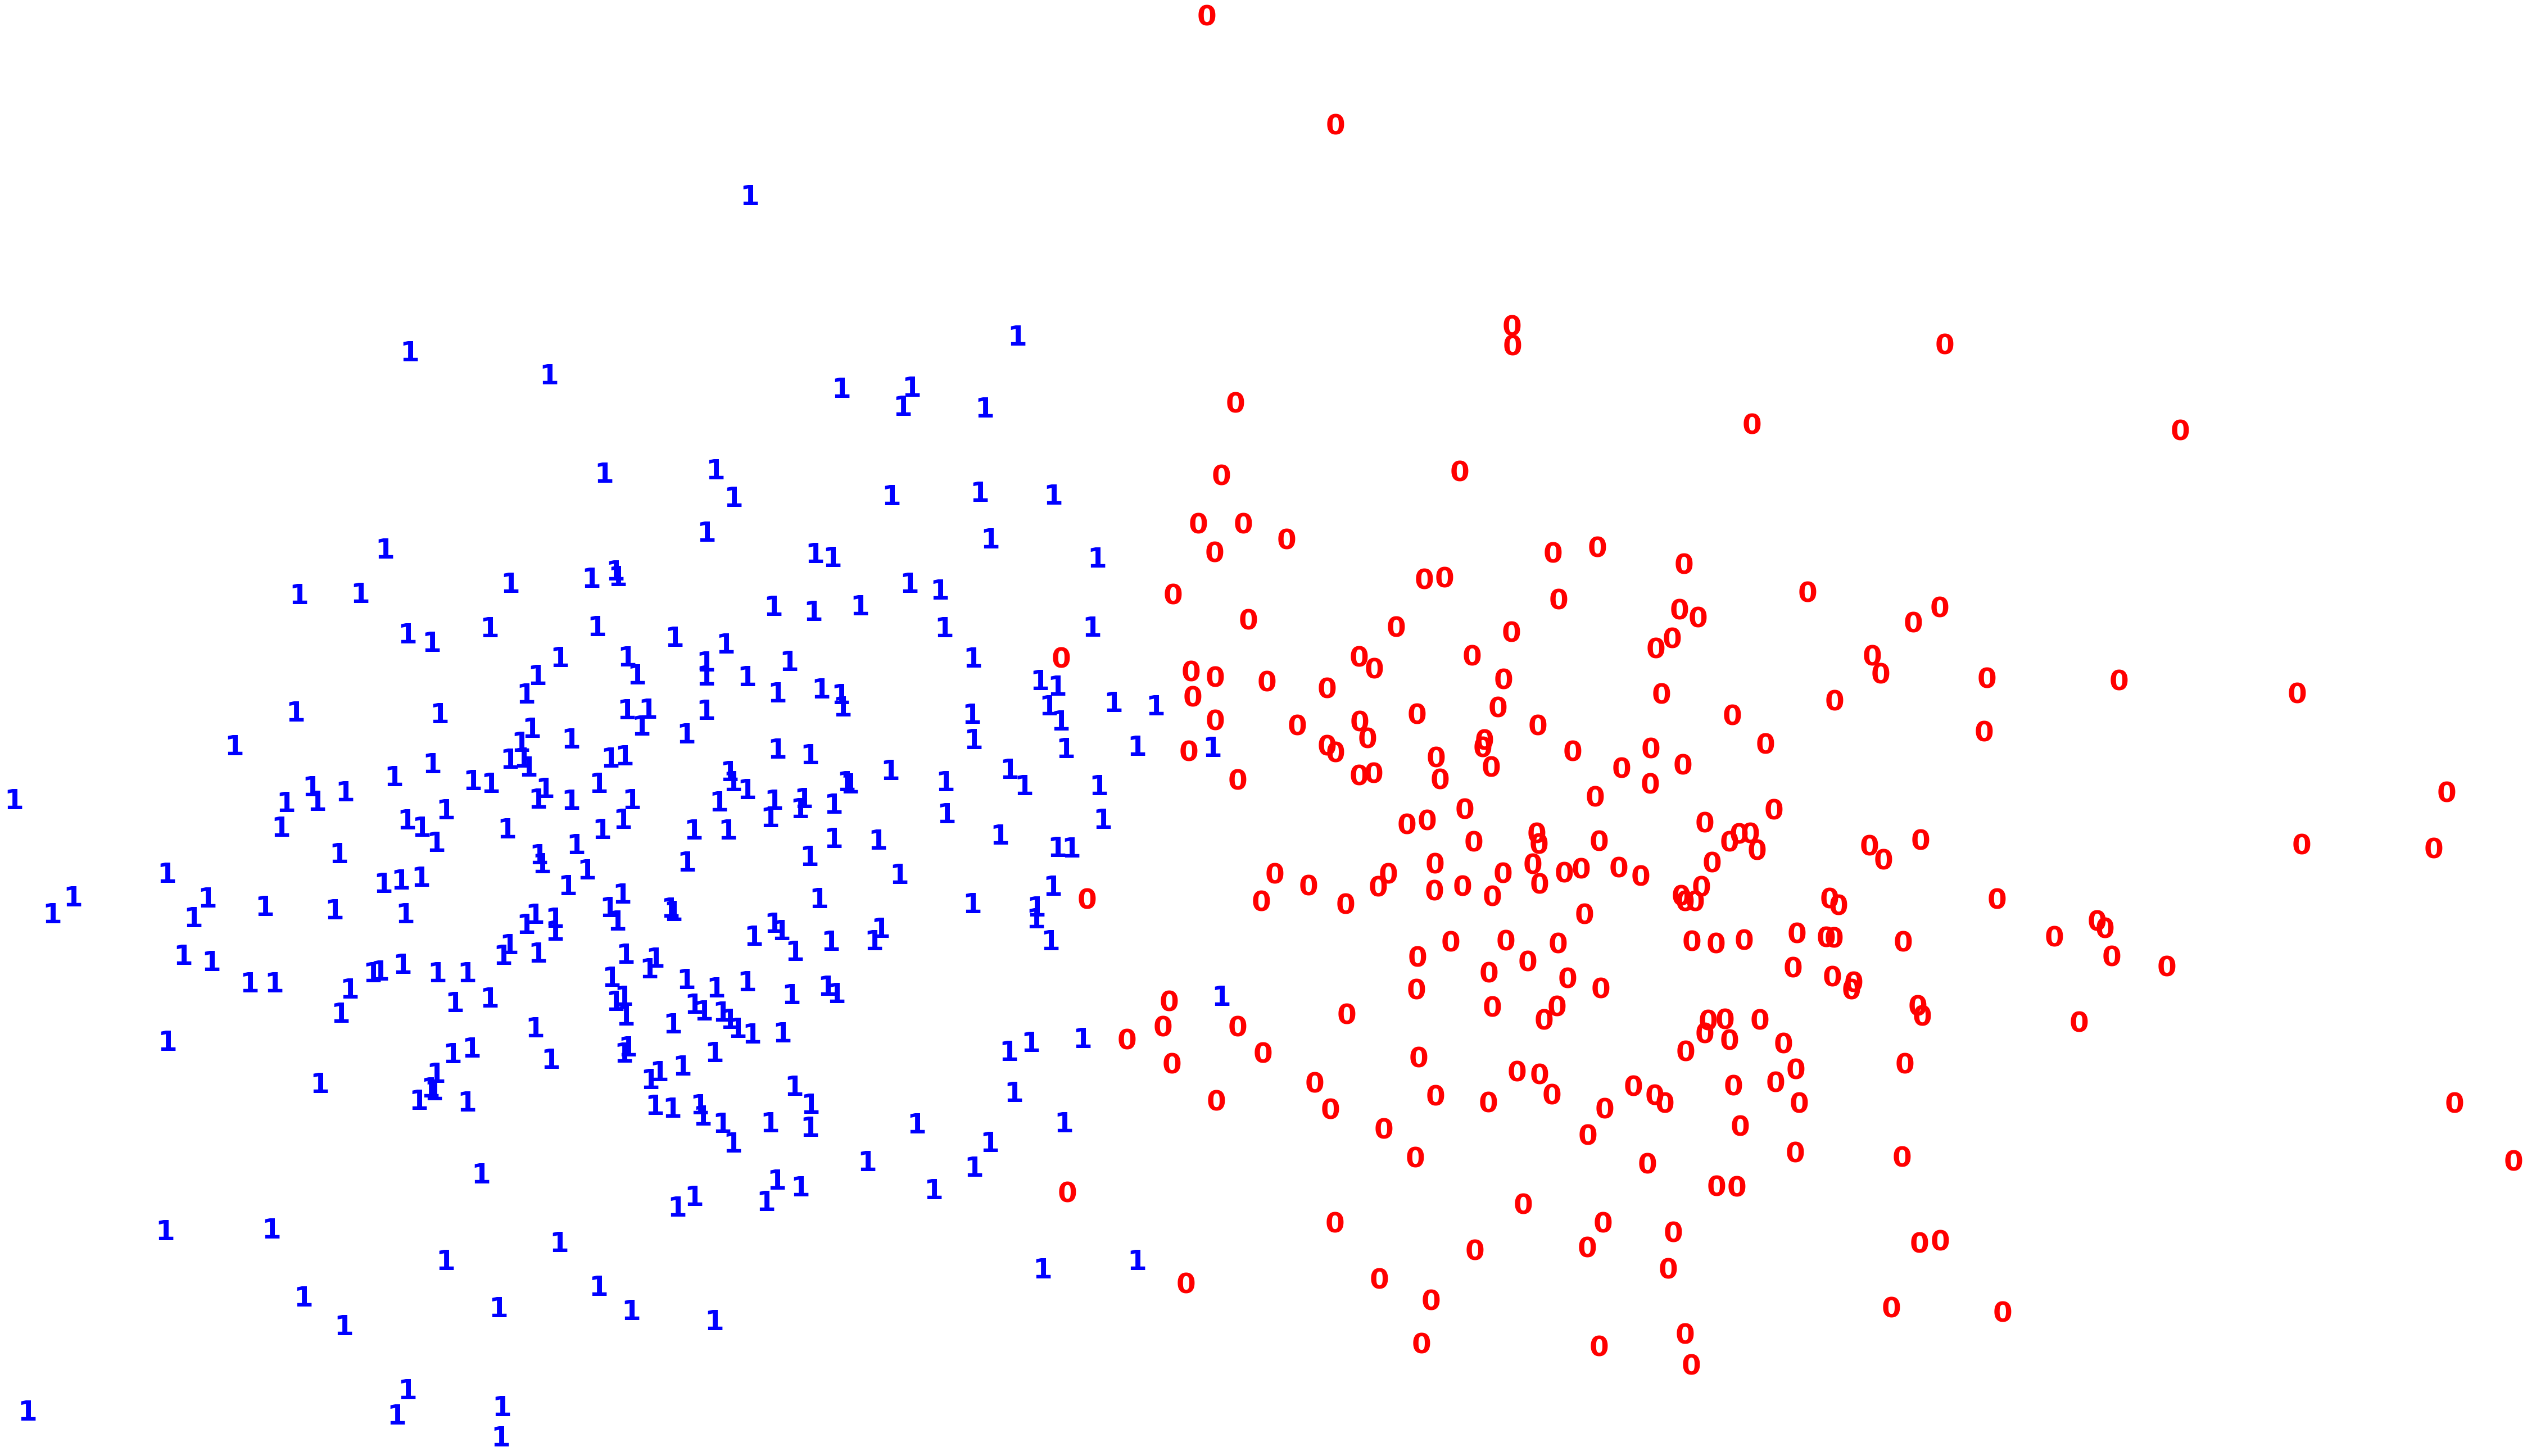

In [366]:
pca = PCA(n_components=2).fit_transform(X_num_churn)

plt.figure(figsize=(10,5))
colours = 'rb'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(y_pred[i]),
             color=colours[y_pred[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [331]:
churngroup_0=churn_1[churn_1['new_y_pred']==0]

In [357]:
group_highdaycharge=churngroup_0.index.to_list()

In [358]:
group_highdaycharge

[10,
 21,
 41,
 48,
 54,
 69,
 77,
 84,
 115,
 126,
 144,
 181,
 214,
 218,
 235,
 241,
 250,
 258,
 332,
 349,
 378,
 399,
 455,
 465,
 473,
 491,
 492,
 502,
 509,
 514,
 521,
 547,
 569,
 588,
 601,
 613,
 715,
 721,
 736,
 737,
 771,
 797,
 830,
 851,
 892,
 894,
 905,
 933,
 966,
 968,
 977,
 1038,
 1077,
 1105,
 1115,
 1121,
 1133,
 1142,
 1150,
 1155,
 1193,
 1232,
 1269,
 1280,
 1310,
 1322,
 1325,
 1327,
 1339,
 1345,
 1346,
 1407,
 1420,
 1435,
 1454,
 1467,
 1484,
 1493,
 1531,
 1532,
 1537,
 1538,
 1614,
 1619,
 1635,
 1638,
 1651,
 1653,
 1662,
 1694,
 1702,
 1746,
 1752,
 1754,
 1765,
 1768,
 1784,
 1837,
 1844,
 1845,
 1851,
 1861,
 1865,
 1866,
 1880,
 1887,
 1889,
 1903,
 1904,
 1912,
 1919,
 1935,
 1939,
 1977,
 1978,
 1984,
 2029,
 2112,
 2115,
 2142,
 2150,
 2158,
 2160,
 2173,
 2187,
 2203,
 2213,
 2218,
 2238,
 2327,
 2335,
 2343,
 2347,
 2357,
 2402,
 2407,
 2420,
 2421,
 2428,
 2432,
 2472,
 2479,
 2489,
 2493,
 2515,
 2533,
 2535,
 2575,
 2581,
 2602,
 2606,
 2

In [332]:
churngroup_0.describe()

account length   area code  number vmail messages  total day minutes  \
count      194.000000  194.000000             194.000000         194.000000   
mean       103.134021  439.293814               7.500000         148.655670   
std         37.747355   43.552259              13.642455          48.301669   
min          1.000000  408.000000               0.000000           0.000000   
25%         77.250000  415.000000               0.000000         120.425000   
50%        103.000000  415.000000               0.000000         148.900000   
75%        126.000000  510.000000               0.000000         173.775000   
max        212.000000  510.000000              45.000000         272.500000   

       total day calls  total day charge  total eve minutes  total eve calls  \
count       194.000000         194.00000         194.000000       194.000000   
mean         99.701031          25.27201         201.714433       100.520619   
std          21.023138           8.21142          50.544362        19.027716   
min           0.000000           0.00000          70.900000        56.000000   
25%          88.000000          20.47250         169.125000        86.000000   
50%         100.000000          25.31500         204.600000       101.000000   
75%         114.000000          29.54250         229.625000       114.750000   
max         165.000000          46.33000         363.700000       143.000000   

       total eve charge  total night minutes  total night calls  \
count        194.000000           194.000000         194.000000   
mean          17.145876           185.969588         101.170103   
std            4.296238            42.369903          19.469837   
min            6.030000            47.400000          56.000000   
25%           14.372500           155.925000          86.250000   
50%           17.390000           184.250000         100.000000   
75%           19.517500           214.800000         116.000000   
max           30.910000           285.000000         152.000000   

       total night charge  total intl minutes  total intl calls  \
count          194.000000          194.000000        194.000000   
mean             8.368763           12.057732          4.113402   
std              1.906791            2.620795          2.702431   
min              2.130000            3.900000          1.000000   
25%              7.020000           10.300000          2.000000   
50%              8.290000           12.000000          3.000000   
75%              9.665000           13.800000          5.000000   
max             12.830000           20.000000         20.000000   

       total intl charge  customer service calls  churn  new_y_pred  
count         194.000000              194.000000  194.0       194.0  
mean            3.255876                2.912371    1.0         0.0  
std             0.707951                1.970653    0.0         0.0  
min             1.050000                0.000000    1.0         0.0  
25%             2.780000                1.000000    1.0         0.0  
50%             3.240000                3.000000    1.0         0.0  
75%             3.730000                4.000000    1.0         0.0  
max             5.400000                8.000000    1.0         0.0

In [333]:
churngroup_1=churn_1[churn_1['new_y_pred']==1]

In [334]:
churngroup_1.describe()

account length   area code  number vmail messages  total day minutes  \
count      289.000000  289.000000             289.000000         289.000000   
mean       102.349481  436.826990               3.515571         246.021799   
std         40.643509   42.321494              10.212360          50.824161   
min         12.000000  408.000000               0.000000         109.600000   
25%         75.000000  408.000000               0.000000         222.300000   
50%        102.000000  415.000000               0.000000         251.800000   
75%        127.000000  415.000000               0.000000         279.300000   
max        225.000000  510.000000              48.000000         350.800000   

       total day calls  total day charge  total eve minutes  total eve calls  \
count       289.000000        289.000000         289.000000       289.000000   
mean        102.432526         41.824221         219.589965       100.588235   
std          21.917374          8.640238          51.357261        20.211727   
min          44.000000         18.630000          75.300000        48.000000   
25%          87.000000         37.790000         183.000000        88.000000   
50%         105.000000         42.810000         222.400000       101.000000   
75%         118.000000         47.480000         255.700000       113.000000   
max         156.000000         59.640000         350.900000       168.000000   

       total eve charge  total night minutes  total night calls  \
count        289.000000           289.000000         289.000000   
mean          18.665225           218.161938          99.882353   
std            4.365070            45.795114          20.284093   
min            6.400000           105.400000          49.000000   
25%           15.560000           184.600000          85.000000   
50%           18.900000           216.100000         100.000000   
75%           21.730000           254.900000         115.000000   
max           29.830000           354.900000         158.000000   

       total night charge  total intl minutes  total intl calls  \
count          289.000000          289.000000        289.000000   
mean             9.817370            9.788581          4.197232   
std              2.060882            2.525696          2.449318   
min              4.740000            2.000000          1.000000   
25%              8.310000            8.300000          2.000000   
50%              9.720000            9.800000          4.000000   
75%             11.470000           11.400000          5.000000   
max             15.970000           17.000000         15.000000   

       total intl charge  customer service calls  churn  new_y_pred  
count         289.000000              289.000000  289.0       289.0  
mean            2.643633                1.771626    1.0         1.0  
std             0.681842                1.619035    0.0         0.0  
min             0.540000                0.000000    1.0         1.0  
25%             2.240000                1.000000    1.0         1.0  
50%             2.650000                1.000000    1.0         1.0  
75%             3.080000                3.000000    1.0         1.0  
max             4.590000                9.000000    1.0         1.0

From the two tables above it's clear to see, among churn customers total day charge is quite different, group 0 of churn customers has average of total day charge 41.82, however average day charge of group 1 of churn customers is 25.27. ALso total day minutes in churngroup_0 us much higher than other group. 
For business purpose, telecommunication company probably need to try to reduce the total day charge of those churned customers in group 1, or offer a more economic package/deal to those customers whose index in group_highdaycharge, there is better chance for telecommunication attracting these customers back to business.

This plot show very clear separation of two clusters in the churn group, which means there are different kinds of churned customers. Therefore it probably is a good idea to make different plans to attract back those churned customers. There is highly chance that different kinds of churned customers needs different strategy.

Let's try kmeans k=3 to see if it's even possible to divide the churned customers into 3 different groups. 

In [373]:
# try change k=3

k_means = KMeans(n_clusters=3, random_state=123)
k_means.fit(X_num_churn)
y_pred = k_means.predict(X_num_churn)


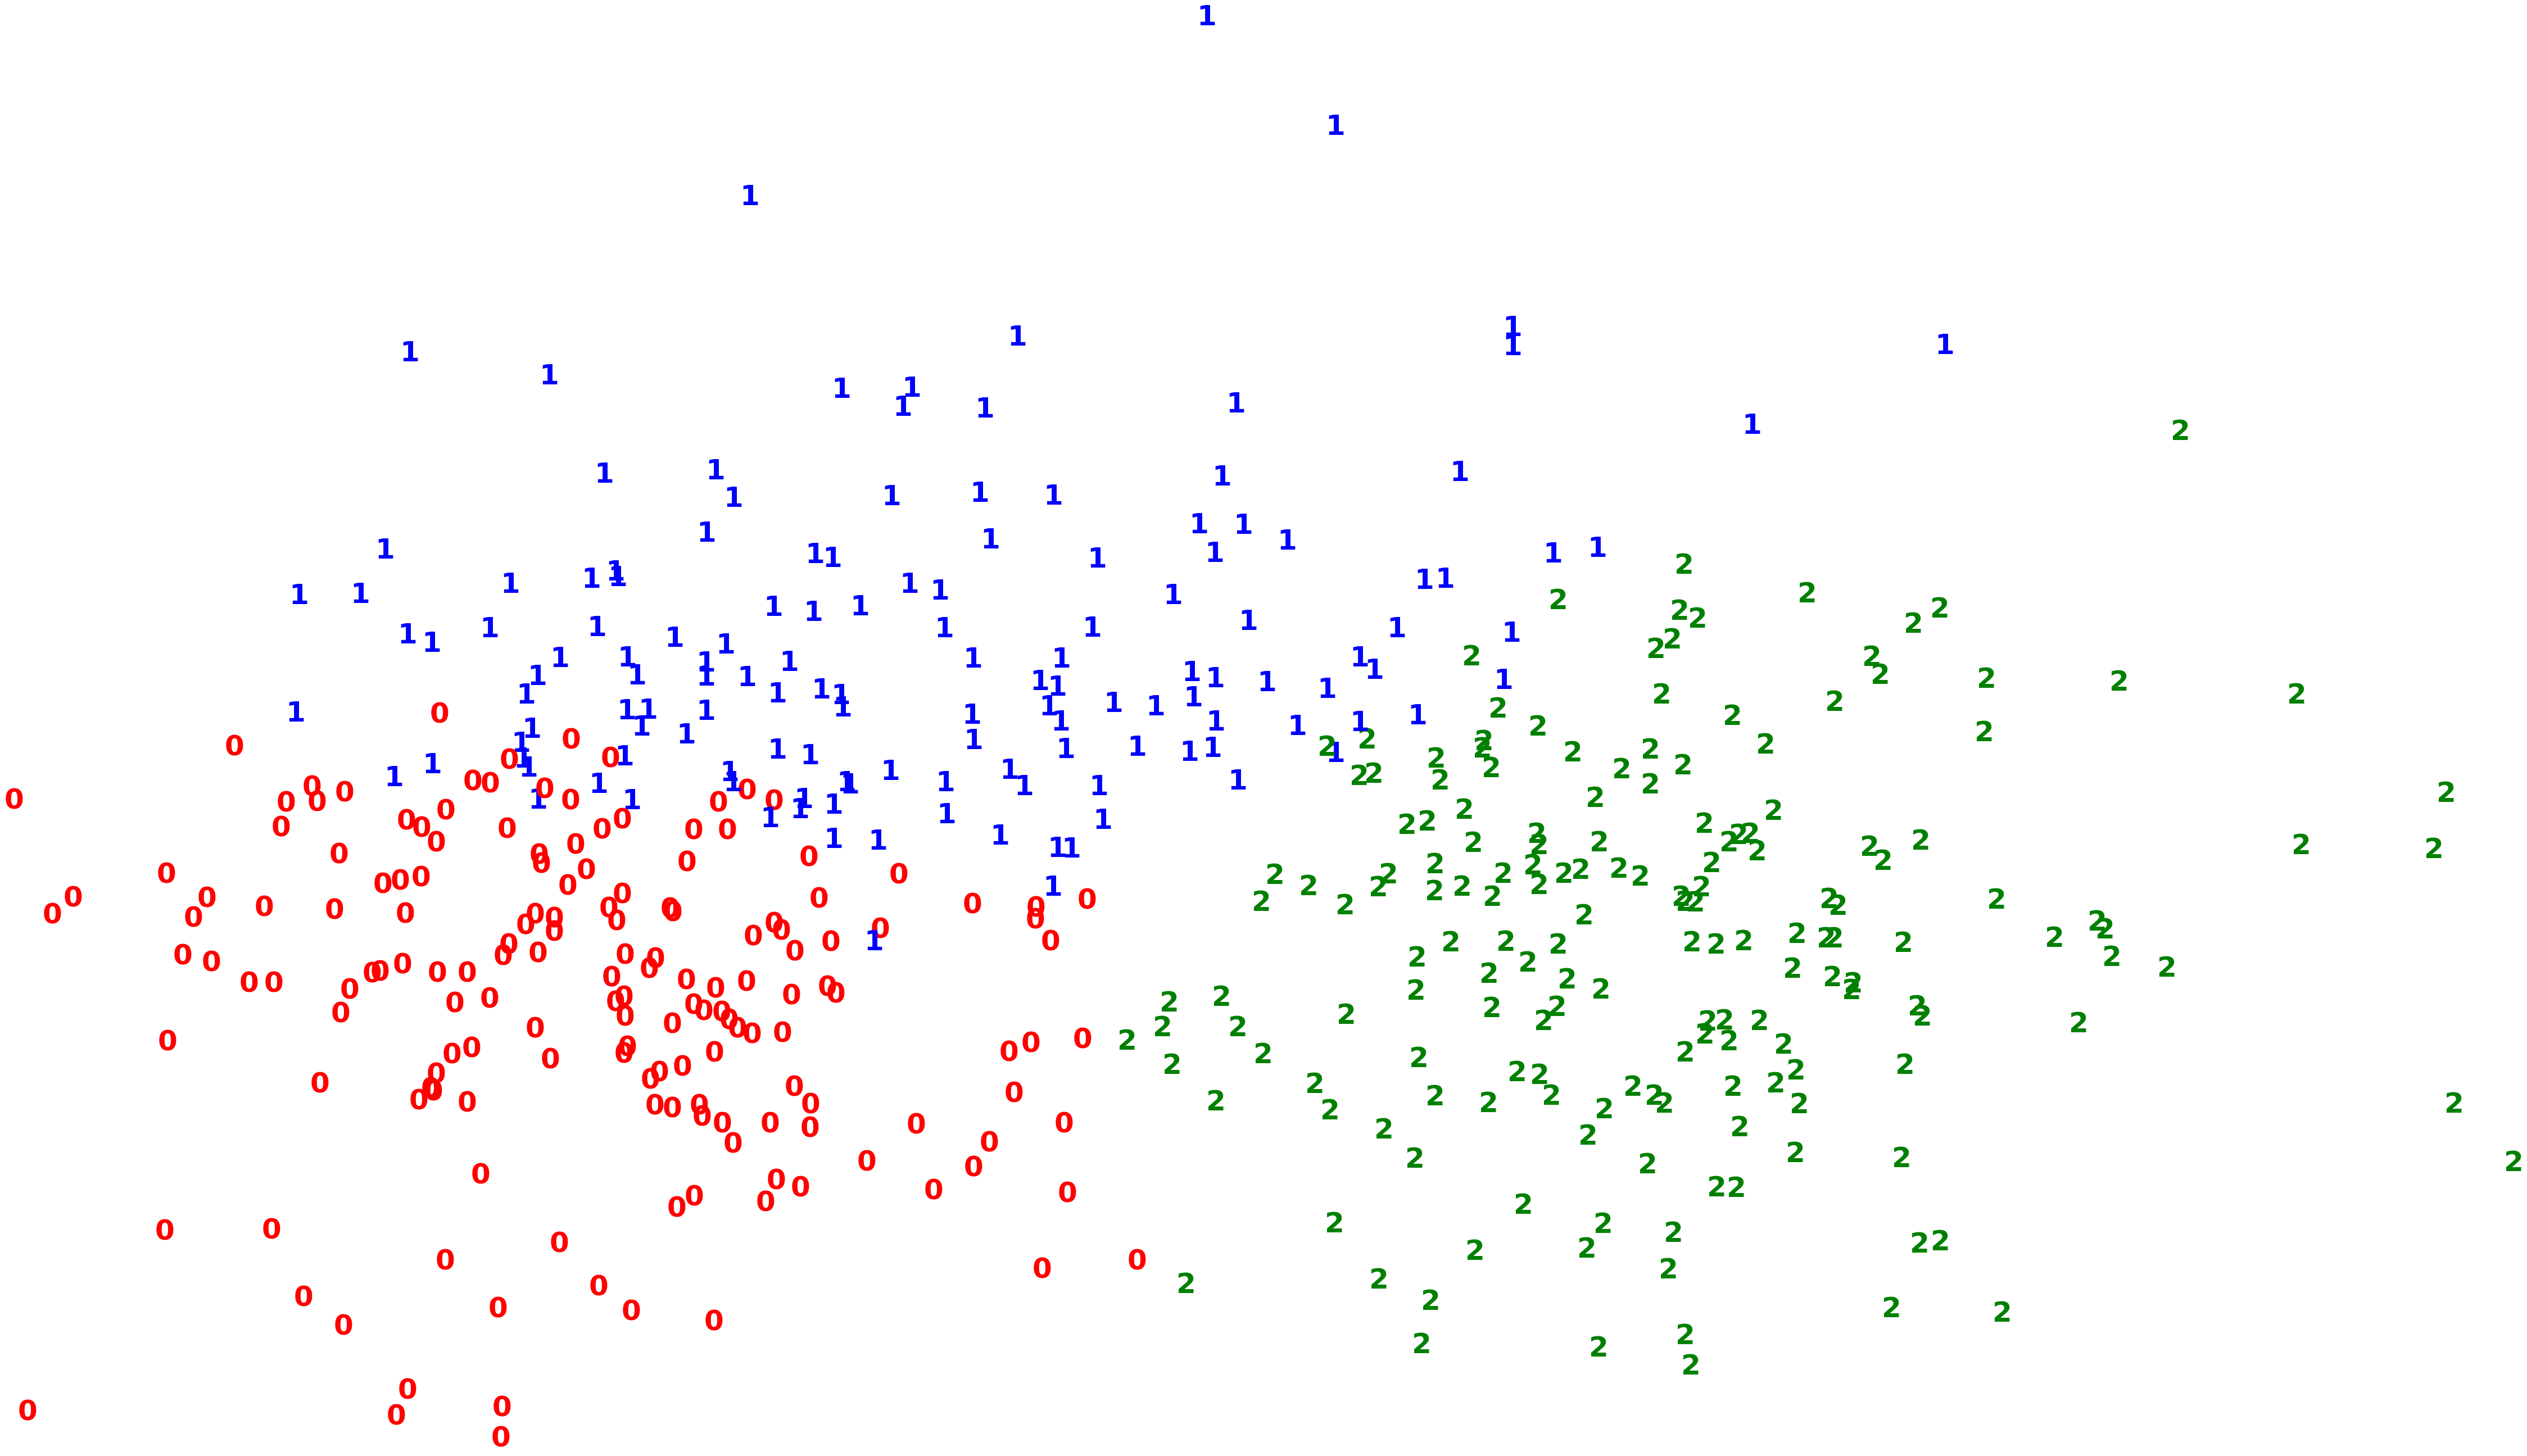

In [374]:
pca = PCA(n_components=2).fit_transform(X_num_churn)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(y_pred[i]),
             color=colours[y_pred[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

Suprisingly to see it is possible cluster three groups among churned customers with almost no overlapping of each clusters.

Now Let me compare the stats of three grous together.

In [375]:
y_churn1=num_churn1.iloc[:,-1]

In [376]:
# Now I'm going to comparing stats for each cluster

churn_1['new_y_pred']=y_pred
y_churn1=y_churn1.reset_index(drop=True)

C:\Users\Yinan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [377]:
churngroup_00=churn_1[churn_1['new_y_pred']==0]

In [378]:
churngroup_01=churn_1[churn_1['new_y_pred']==1]

In [379]:
churngroup_02=churn_1[churn_1['new_y_pred']==2]

In [381]:
churngroup_00.describe()

account length   area code  number vmail messages  total day minutes  \
count      166.000000  166.000000             166.000000         166.000000   
mean       100.475904  434.277108               1.638554         257.437952   
std         39.453341   40.783482               7.402830          43.150657   
min         12.000000  408.000000               0.000000          89.500000   
25%         75.000000  408.000000               0.000000         234.575000   
50%         97.000000  415.000000               0.000000         262.750000   
75%        122.750000  415.000000               0.000000         282.200000   
max        225.000000  510.000000              42.000000         350.800000   

       total day calls  total day charge  total eve minutes  total eve calls  \
count       166.000000        166.000000         166.000000       166.000000   
mean        104.668675         43.765060         237.555422       101.126506   
std          20.510275          7.335559          45.360634        20.491291   
min          44.000000         15.220000         129.400000        48.000000   
25%          92.250000         39.880000         206.025000        88.000000   
50%         105.500000         44.670000         237.100000       102.000000   
75%         118.750000         47.977500         268.325000       113.000000   
max         156.000000         59.640000         350.500000       168.000000   

       total eve charge  total night minutes  total night calls  \
count        166.000000           166.000000         166.000000   
mean          20.192169           230.894578          96.650602   
std            3.855690            41.675420          19.845728   
min           11.000000           145.400000          51.000000   
25%           17.510000           197.950000          80.250000   
50%           20.155000           232.750000          97.000000   
75%           22.805000           261.975000         113.500000   
max           29.790000           354.900000         141.000000   

       total night charge  total intl minutes  total intl calls  \
count          166.000000          166.000000        166.000000   
mean            10.390301            9.074096          4.289157   
std              1.875533            2.123631          2.556181   
min              6.540000            2.000000          1.000000   
25%              8.910000            8.000000          2.000000   
50%             10.475000            9.050000          4.000000   
75%             11.790000           10.400000          5.750000   
max             15.970000           14.200000         15.000000   

       total intl charge  customer service calls  churn  new_y_pred  
count         166.000000              166.000000  166.0       166.0  
mean            2.450723                1.415663    1.0         0.0  
std             0.573328                1.221820    0.0         0.0  
min             0.540000                0.000000    1.0         0.0  
25%             2.160000                1.000000    1.0         0.0  
50%             2.445000                1.000000    1.0         0.0  
75%             2.810000                2.000000    1.0         0.0  
max             3.830000                5.000000    1.0         0.0

Comparing the table above and below, clearly showing churngroup_00 has much higher value in total day minutes and total night minutes and total night charge. However, churngroup_00 has lower international charge than churngroup_01, and difference between total night minutes is 230.89-187.58=43.31, but difference between night charge is only 10.39-8.44=1.95. This is kind if unfair to churngroup_01 in terms of night call charge, som telecom company probably should offere better deal for customers in churngroup_00 to decrease their night call price. At the same time, this conclusion conforms to earlier result of KNN best model of SMOTED data.  

In [382]:
churngroup_01.describe()

account length   area code  number vmail messages  total day minutes  \
count      141.000000  141.000000             141.000000         141.000000   
mean       105.432624  436.943262               6.035461         231.530496   
std         41.303114   42.223855              12.254685          52.576037   
min         16.000000  408.000000               0.000000          99.600000   
25%         71.000000  415.000000               0.000000         194.200000   
50%        108.000000  415.000000               0.000000         237.300000   
75%        133.000000  415.000000               0.000000         270.500000   
max        212.000000  510.000000              44.000000         345.300000   

       total day calls  total day charge  total eve minutes  total eve calls  \
count       141.000000        141.000000         141.000000       141.000000   
mean         99.851064         39.360638         225.684397       100.063830   
std          21.290151          8.938034          43.360903        18.840387   
min          48.000000         16.930000         108.200000        60.000000   
25%          85.000000         33.010000         197.500000        88.000000   
50%         101.000000         40.340000         223.200000        98.000000   
75%         114.000000         45.990000         255.800000       113.000000   
max         148.000000         58.700000         363.700000       151.000000   

       total eve charge  total night minutes  total night calls  \
count        141.000000           141.000000         141.000000   
mean          19.183191           187.587943         107.595745   
std            3.685392            43.240939          18.921635   
min            9.200000            72.400000          62.000000   
25%           16.790000           159.100000          94.000000   
50%           18.970000           192.000000         107.000000   
75%           21.740000           214.500000         119.000000   
max           30.910000           287.700000         158.000000   

       total night charge  total intl minutes  total intl calls  \
count          141.000000          141.000000        141.000000   
mean             8.441348           13.260993          4.546099   
std              1.946121            2.019186          2.857259   
min              3.260000            9.300000          1.000000   
25%              7.160000           11.600000          2.000000   
50%              8.640000           13.300000          4.000000   
75%              9.650000           14.300000          6.000000   
max             12.950000           20.000000         20.000000   

       total intl charge  customer service calls  churn  new_y_pred  
count         141.000000              141.000000  141.0       141.0  
mean            3.580922                1.425532    1.0         1.0  
std             0.545132                1.353483    0.0         0.0  
min             2.510000                0.000000    1.0         1.0  
25%             3.130000                0.000000    1.0         1.0  
50%             3.590000                1.000000    1.0         1.0  
75%             3.860000                2.000000    1.0         1.0  
max             5.400000                9.000000    1.0         1.0

Comparing churngroup_01 and churngroup_02, it's easy to see total day charge difference between them is 231.53-139.53=92, but the differnce of total day charge is onyl 39.36-23.72=15.64, this is "unfair" to churngroup_02 customers. And difference of total night charge is 8.44-8.78=-0.34. 
Conclusion to say, telecom company needs to offere better deal on night call price for customers in churngroup_02, since churngroup_02 customers made more night calls. And telecom company needs to make plans to offer better deal on day calls price to customers in churngrup_01. 

In [383]:
churngroup_02.describe()

account length   area code  number vmail messages  total day minutes  \
count      176.000000  176.000000             176.000000         176.000000   
mean       102.511364  441.857955               7.659091         139.539773   
std         38.042831   44.945901              14.034151          40.871600   
min          1.000000  408.000000               0.000000           0.000000   
25%         80.500000  413.250000               0.000000         115.075000   
50%        103.000000  415.000000               0.000000         138.250000   
75%        124.000000  510.000000               0.000000         166.025000   
max        224.000000  510.000000              48.000000         240.000000   

       total day calls  total day charge  total eve minutes  total eve calls  \
count       176.000000        176.000000         176.000000       176.000000   
mean         99.380682         23.722273         178.059091       100.426136   
std          22.528394          6.948424          44.693586        19.778927   
min           0.000000          0.000000          70.900000        56.000000   
25%          84.750000         19.565000         143.500000        86.000000   
50%         100.500000         23.505000         179.400000       101.000000   
75%         115.000000         28.227500         209.675000       115.250000   
max         165.000000         40.800000         315.400000       159.000000   

       total eve charge  total night minutes  total night calls  \
count        176.000000           176.000000         176.000000   
mean          15.135341           195.161932          98.170455   
std            3.798784            44.807647          19.454105   
min            6.030000            47.400000          49.000000   
25%           12.195000           166.450000          83.000000   
50%           15.250000           189.700000          98.000000   
75%           17.825000           225.875000         114.000000   
max           26.810000           321.200000         152.000000   

       total night charge  total intl minutes  total intl calls  \
count          176.000000          176.000000        176.000000   
mean             8.782614           10.181818          3.738636   
std              2.016321            2.431627          2.219366   
min              2.130000            3.900000          1.000000   
25%              7.490000            8.700000          2.000000   
50%              8.540000           10.300000          3.000000   
75%             10.167500           11.900000          5.000000   
max             14.450000           15.800000         15.000000   

       total intl charge  customer service calls  churn  new_y_pred  
count         176.000000              176.000000  176.0       176.0  
mean            2.749545                3.642045    1.0         2.0  
std             0.656753                1.852333    0.0         0.0  
min             1.050000                0.000000    1.0         2.0  
25%             2.350000                2.000000    1.0         2.0  
50%             2.780000                4.000000    1.0         2.0  
75%             3.210000                5.000000    1.0         2.0  
max             4.270000                9.000000    1.0         2.0

## Conclusion

This project conludes several important churn related factors. Day call charge plays a really important part of deciding wether customers churn or not. 
From the aspect of modeling part, KNN is the so far the best classifier for supervised learning process to classify on the data, the best overall accuracy is around 95%,  comparing to Adaboost classifier, logistic regression, SVM, and Randome forest classifier etc. The accuracy of only identifying class 1 churn group is 95%-99% from KNN best model after tuning.
For the clustering part, clustering using multiple models, the data features didn't perform well on separating the two classes(1 and 0). However, clusting models worked very well within the churn group for separation different kinds of churn customers, which shows insights on why people churn and the difference reasons of churn from different customers.
For future research, there should be financial analysis combined with this customer churn analysis, to enhance the revenue orientied business plans.